In [2]:
import matplotlib
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from scipy import optimize as opt
import cmath as cm
from fractions import Fraction

%matplotlib inline

## Jordan-Wigner quasi particle spectrum

In [3]:
def Xi(h,J,q):
    """
    h is shifted with uniform field
    """
    energy_squared = 4*((h-J*np.cos(q))**2+(J*np.sin(q))**2)
    return np.sqrt(energy_squared)

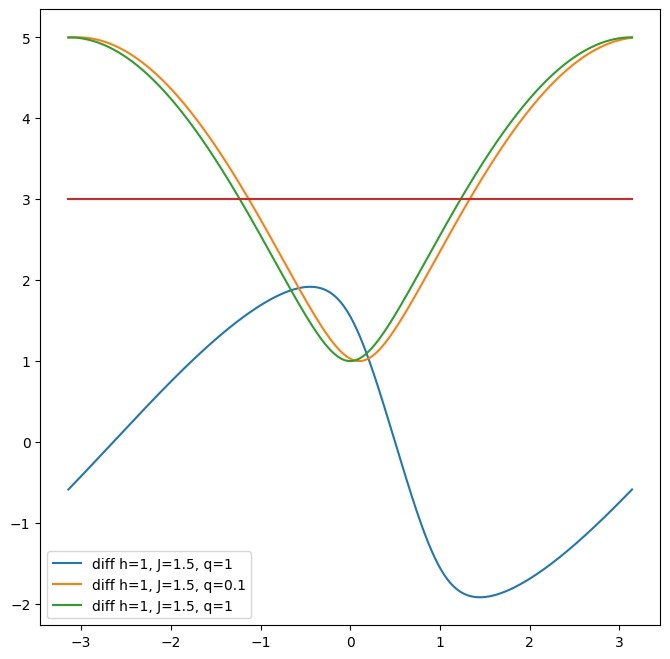

In [4]:
q=1
h=1
J=1.5

fig, ax = plt.subplots(figsize=(8,8))
k_space = np.linspace(-np.pi,np.pi,501)
ax.plot(k_space,Xi(h,J,k_space-q)-Xi(h,J,k_space),label=f"diff h={h}, J={J}, q={q}")
q2=0.1
ax.plot(k_space,Xi(h,J,k_space-q2),label=f"diff h={h}, J={J}, q={q2}")
ax.plot(k_space,Xi(h,J,k_space),label=f"diff h={h}, J={J}, q={q}")
ax.plot(k_space,np.ones(501)*3*q)
#ax.plot(k_space,2*J*k_space,label="2J*k")

        
ax.legend(loc='best')

## Plotting $\Omega_q$

In [5]:
def nF(E,T):
    if T != 0:
        return 1/(np.exp(E/T)+1)
    elif T == 0:
        if E > 0:
            return 0
        if E < 0:
            return 1
        if E == 0:
            return 0.5

def func(k,q,h,J):
    return (2*h-2*J*np.cos(k))*(2*h-2*J*np.cos(k-q))-2*J*np.sin(k)*2*J*np.sin(k-q)

def integrand(k,q,w,h,J,g,T):
    I = ( 
    -( ( func(k,q,h,J)+Xi(h,J,k)*(Xi(h,J,k)-w) ) / (Xi(h,J,k-q)**2 - (Xi(h,J,k)-w)**2) * (nF(Xi(h,J,k),T))/(Xi(h,J,k)) )
    +( ( func(k,q,h,J)+Xi(h,J,k)*(Xi(h,J,k)+w) ) / (Xi(h,J,k-q)**2 - (Xi(h,J,k)+w)**2) * (nF(-Xi(h,J,k),T))/(Xi(h,J,k)) )
    -( ( func(k,q,h,J)+Xi(h,J,k-q)*(Xi(h,J,k-q)+w) ) / (Xi(h,J,k)**2 - (Xi(h,J,k-q)+w)**2) * (nF(Xi(h,J,k-q),T))/(Xi(h,J,k-q)) )
    +( ( func(k,q,h,J)+Xi(h,J,k-q)*(Xi(h,J,k-q)-w) ) / (Xi(h,J,k)**2 - (Xi(h,J,k-q)-w)**2) * (nF(-Xi(h,J,k-q),T))/(Xi(h,J,k-q)) )
    )
    return I

def Omega_new(q,w,h,J,g,T,L):
    k_space = [(2*n-1)*np.pi/L for n in range(-int(L/2)+1,int(L/2)+1)]
    return 4*g**2/L*sum(integrand(k,q,w,h,J,g,T) for k in k_space)

def Omega(q,w,L,T,g,h,J):
    n_space = 2*np.arange(1-int(L/2),int(L/2)+1)-1
    k_space = np.pi/L * n_space
    #print("k= " + str(k_space))
    sum = 0
    for k in k_space:
        # print(k)
        sum -= ( func(k,q,h,J)*(
            (
            ( nF(Xi(h,J,k),T)-1 ) / ( Xi(h,J,k)*( Xi(h,J,k-q)**2 - ( Xi(h,J,k)+w )**2 ) )
        ) + (
            nF(Xi(h,J,k),T) / ( Xi(h,J,k)*( Xi(h,J,k-q)**2 - ( Xi(h,J,k)-w )**2 ) )
        ) + (
            ( nF(Xi(h,J,k-q),T)-1 ) / ( Xi(h,J,k-q)*( Xi(h,J,k)**2 - (Xi(h,J,k-q)-w)**2 ) )
        ) + (
            nF(Xi(h,J,k-q),T) / ( Xi(h,J,k-q)*( Xi(h,J,k)**2 - (Xi(h,J,k-q)+w)**2 ) )
        )) + ((
            ( nF(Xi(h,J,k),T) - 1 ) * ( Xi(h,J,k) + w ) / ( Xi(h,J,k-q)**2 - ( Xi(h,J,k) + w )**2 )
        ) + (
            nF(Xi(h,J,k),T) * ( Xi(h,J,k) - w ) / ( Xi(h,J,k-q)**2 - (Xi(h,J,k) - w)**2 )
        ) + (
            ( nF(Xi(h,J,k-q),T) - 1 ) * ( Xi(h,J,k-q) - w ) / ( Xi(h,J,k)**2 - (Xi(h,J,k-q) - w)**2 )
        ) + (
            nF(Xi(h,J,k-q),T) * ( Xi(h,J,k-q) + w ) / ( Xi(h,J,k)**2 - (Xi(h,J,k-q) + w)**2 )
        )
        ) )
    return 4*g**2 / L * sum


In [6]:
hT=1
JT=1.2
gT=0.1
TT=0
wT=1
qT=1.8
LT=20

print(Omega(q=qT,w=wT,L=LT,T=TT,g=gT,h=hT,J=JT))
print(Omega_new(q=qT,w=wT,h=hT,J=JT,g=gT,T=TT,L=LT))

-0.006201187779129399
-0.006201187779128692


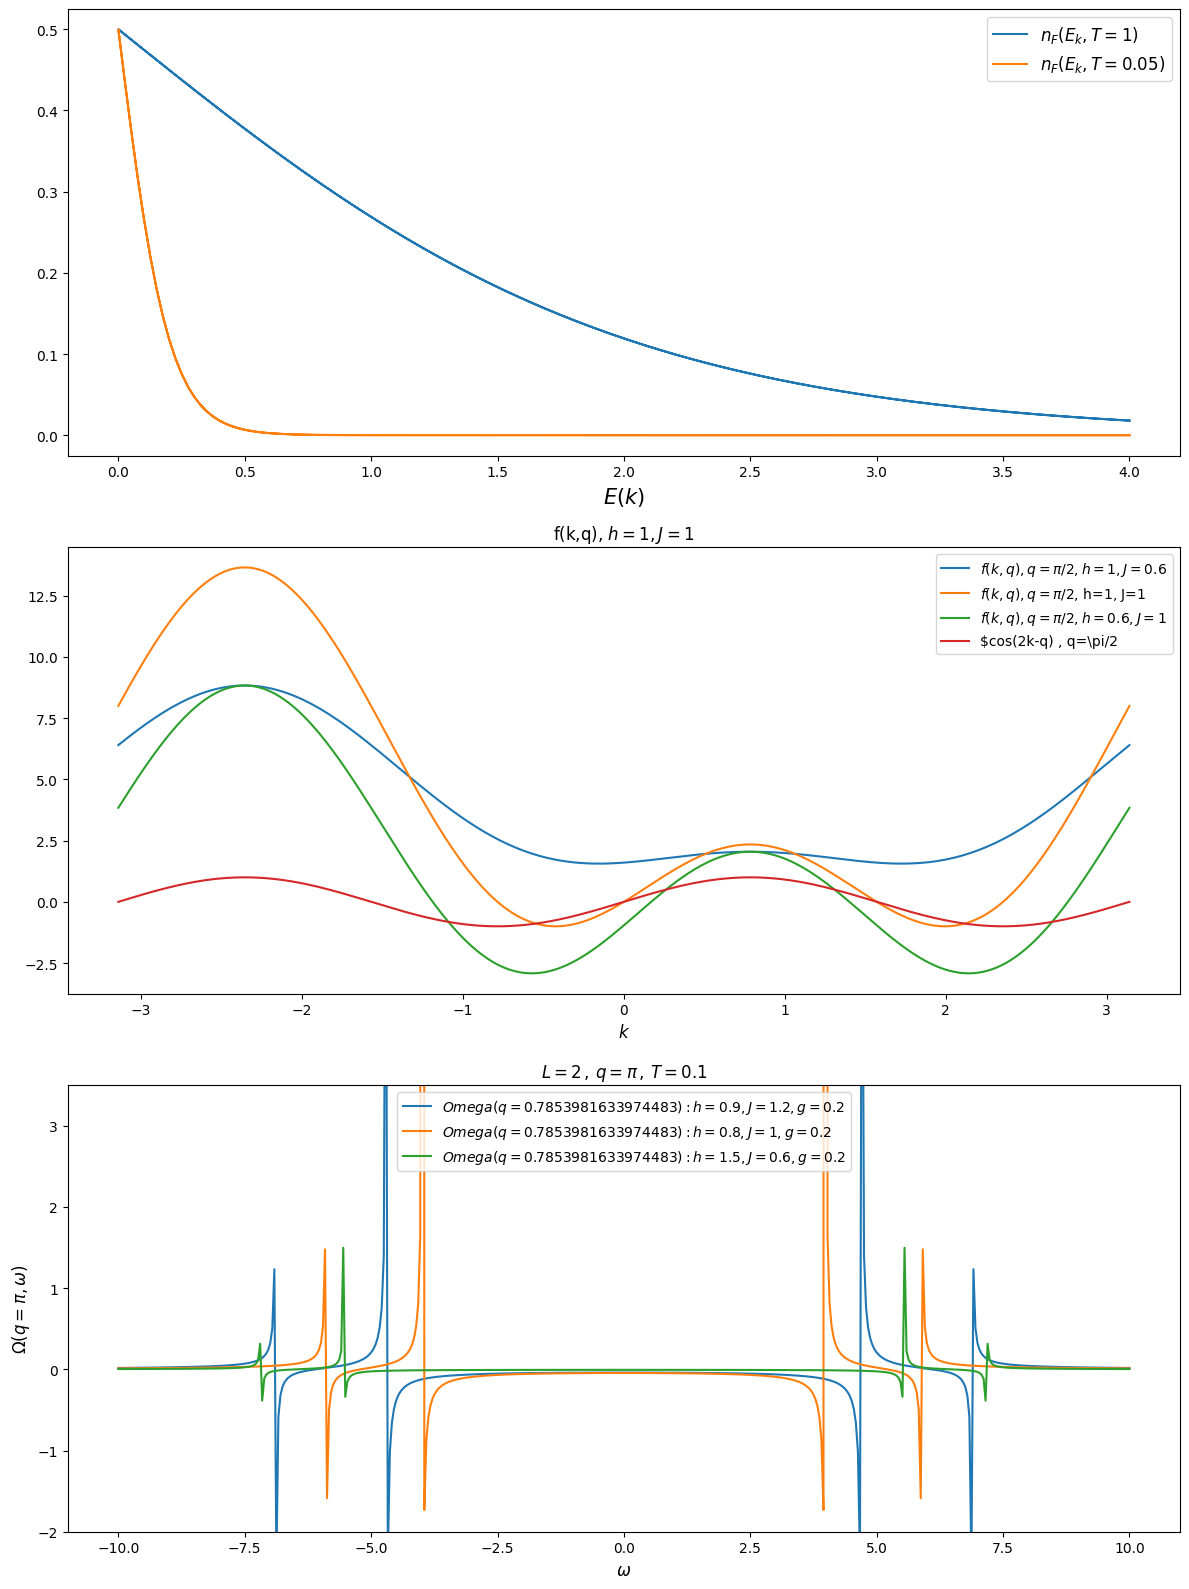

In [8]:
k_space = np.linspace(-np.pi,np.pi,501)
fig, axs = plt.subplots(3,figsize=(12,16))
axs[0].plot(Xi(1,1,k_space),nF(Xi(1,1,k_space),1), label='$n_F(E_k,T=1)$')
axs[0].plot(Xi(1,1,k_space),nF(Xi(1,1,k_space),0.1), label='$n_F(E_k,T=0.05)$')
axs[0].set_xlabel('$E(k)$',fontsize=15)
axs[0].legend(fontsize=12)

axs[1].plot(k_space,func(k_space,np.pi/2,h=1,J=0.6), label='$f(k,q) , q=\pi/2 , h=1, J=0.6$')
axs[1].plot(k_space,func(k_space,np.pi/2,h=1,J=1), label='$f(k,q) , q=\pi/2$, h=1, J=1')
axs[1].plot(k_space,func(k_space,np.pi/2,h=0.6,J=1), label='$f(k,q) , q=\pi/2, h=0.6, J=1$')
axs[1].plot(k_space,np.cos(2*k_space-np.pi/2), label='$cos(2k-q) , q=\pi/2')
axs[1].set_xlabel('$k$',fontsize=12)
axs[1].set_title("f(k,q), $h=1,J=1$")
axs[1].legend(fontsize=10)

#Look at omega for different omega at same k=pi for L=2.
w_space = np.linspace(-10,10,500)
q = np.pi/4
axs[2].plot(w_space,Omega(q,w=w_space,L=2,T=0.1,g=0.2,h=0.9,J=1.2),label=f"$Omega(q={q}): h=0.9, J=1.2, g=0.2$")
axs[2].plot(w_space,Omega(q,w=w_space,L=2,T=0.1,g=0.2,h=0.8,J=1),label=f"$Omega(q={q}): h=0.8, J=1, g=0.2$")
axs[2].plot(w_space,Omega(q,w=w_space,L=2,T=0.1,g=0.2,h=1.5,J=0.6),label=f"$Omega(q={q}): h=1.5, J=0.6, g=0.2$")
axs[2].legend()
axs[2].set_xlabel("$\omega$",fontsize=12)
axs[2].set_ylabel("$\Omega(q=\pi,\omega)$",fontsize=12)
axs[2].set_title("$L=2 \, ,\, q=\pi \, , \, T=0.1$",fontsize=12)
axs[2].set_ylim((-2,3.5))

fig.tight_layout()

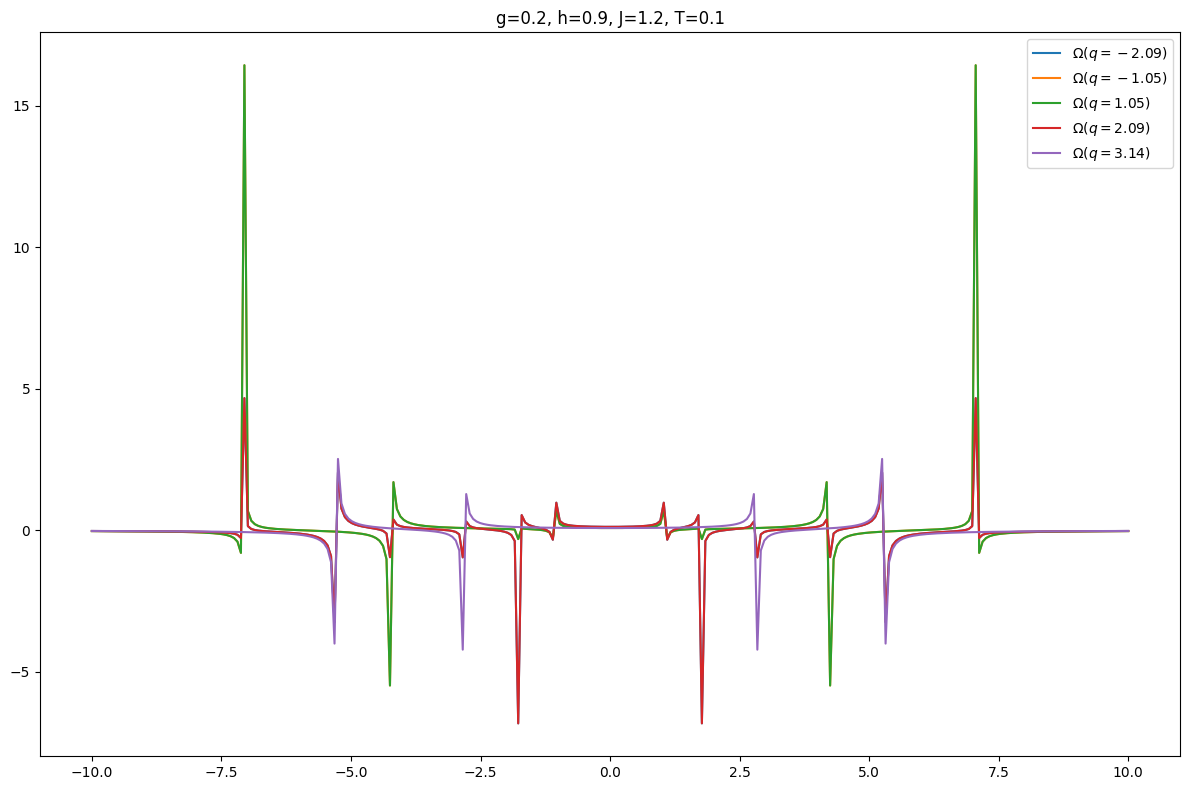

In [13]:
fig, ax = plt.subplots(1,figsize=(12,8))

#Look at omega for different omega at same k=pi for L=10. K=pi/5(-4,-3,-2,-1,1,2,3,4,5).
#Use to solve for W = \pm hbar w sqrt( 1 + 4Omega_q/hbar w)
Lq = 6
q_space = 2*np.pi/Lq*np.array( [int(x) for x in (np.arange(-Lq/2,Lq/2)+1) if x != 0] )
w_space = np.linspace(-10,10,300)
for q in q_space:
    ax.plot(w_space,Omega(q,w=w_space,L=Lq,T=10,g=0.8,h=0.9,J=1.2),label="$\Omega(q={fq})$".format(fq=str(round(q,2)) ) )
ax.legend(fontsize=10)
ax.set_title("g=0.2, h=0.9, J=1.2, T=0.1", fontsize=12)

fig.tight_layout()

## Graphically finding poles of Green function

Solving the equation $\Omega_q(\omega) = \omega^2$

q space: [-2.82743339 -2.51327412 -2.19911486 -1.88495559 -1.57079633 -1.25663706
 -0.9424778  -0.62831853 -0.31415927  0.31415927  0.62831853  0.9424778
  1.25663706  1.57079633  1.88495559  2.19911486  2.51327412  2.82743339
  3.14159265]


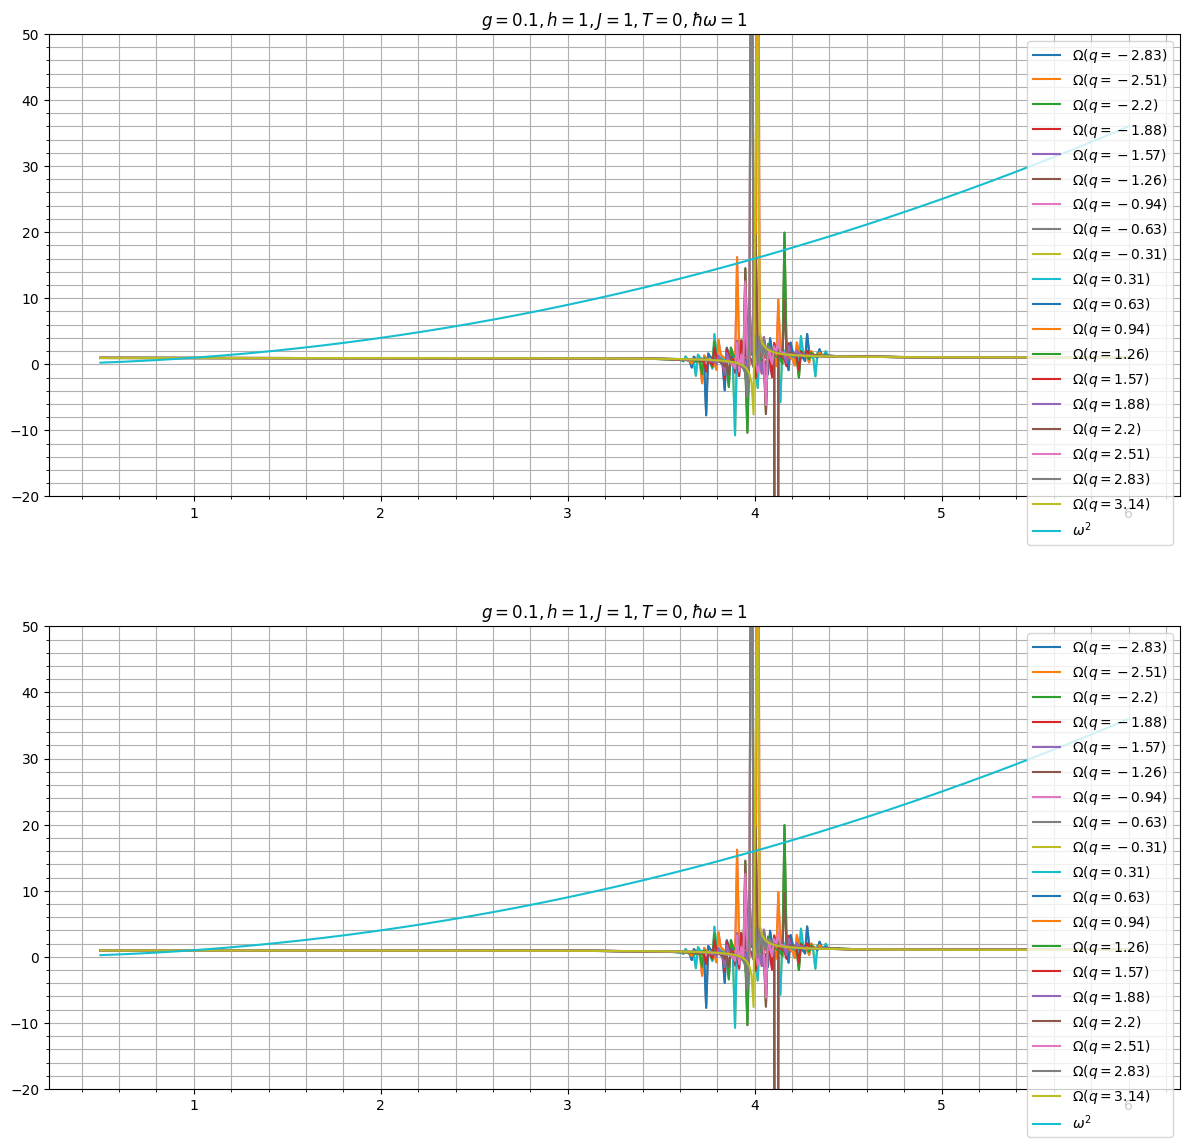

In [37]:
fig, axs = plt.subplots(2,figsize=(12,12))
Lq = 20
hw = 1
g1=0.1
h1=1
J1=1
T1=0

g2 = 0.1

#Look at omega for different omega at same k=pi for L=10. K=pi/5(-4,-3,-2,-1,1,2,3,4,5).
#Use to solve for W = \pm hbar w sqrt( 1 + 4Omega_q/hbar w)

q_space = 2*np.pi/Lq*np.array( [int(x) for x in (np.arange(-Lq/2,Lq/2)+1) if x != 0] )
print("q space: "+str(q_space))
w_space = np.linspace(0.5,6,500)

for q in q_space:
    axs[0].plot(w_space,hw**2*( 1 + 4*Omega_new(q,w=w_space,L=Lq,T=T1,g=g1,h=h1,J=J1)/hw ),label="$\Omega(q={fq})$".format(fq=str(round(q,2))) )
axs[0].plot(w_space,w_space**2, label="$\omega^2$")
axs[0].legend(fontsize=10)
axs[0].set_title("$g={fg}, h={fh}, J={fJ}, T={fT}, \hbar\omega={fhw}$".format(fg=g1,fh=h1,fJ=J1,fT=T1,fhw=hw), fontsize=12)
axs[0].minorticks_on()
axs[0].grid(which='both')
axs[0].set_ylim(-20,50)

for q in q_space:
    axs[1].plot(w_space,hw**2*( 1 + 4*Omega_new(q,w=w_space,L=Lq,T=T1,g=g2,h=h1,J=J1)/hw ),label="$\Omega(q={fq})$".format(fq=str(round(q,2))) )
axs[1].plot(w_space,w_space**2, label="$\omega^2$")
axs[1].legend(fontsize=10)
axs[1].set_title("$g={fg}, h={fh}, J={fJ}, T={fT}, \hbar\omega={fhw}$".format(fg=g2,fh=h1,fJ=J1,fT=T1,fhw=hw), fontsize=12)
axs[1].minorticks_on()
axs[1].grid(which='both')
axs[1].set_ylim(-20,50)

fig.tight_layout()

q space: [-2.51327412 -1.88495559 -1.25663706 -0.62831853  0.62831853  1.25663706
  1.88495559  2.51327412  3.14159265]
q plus space: [0.6283185307179586, 1.2566370614359172, 1.8849555921538759, 2.5132741228718345, 3.141592653589793]


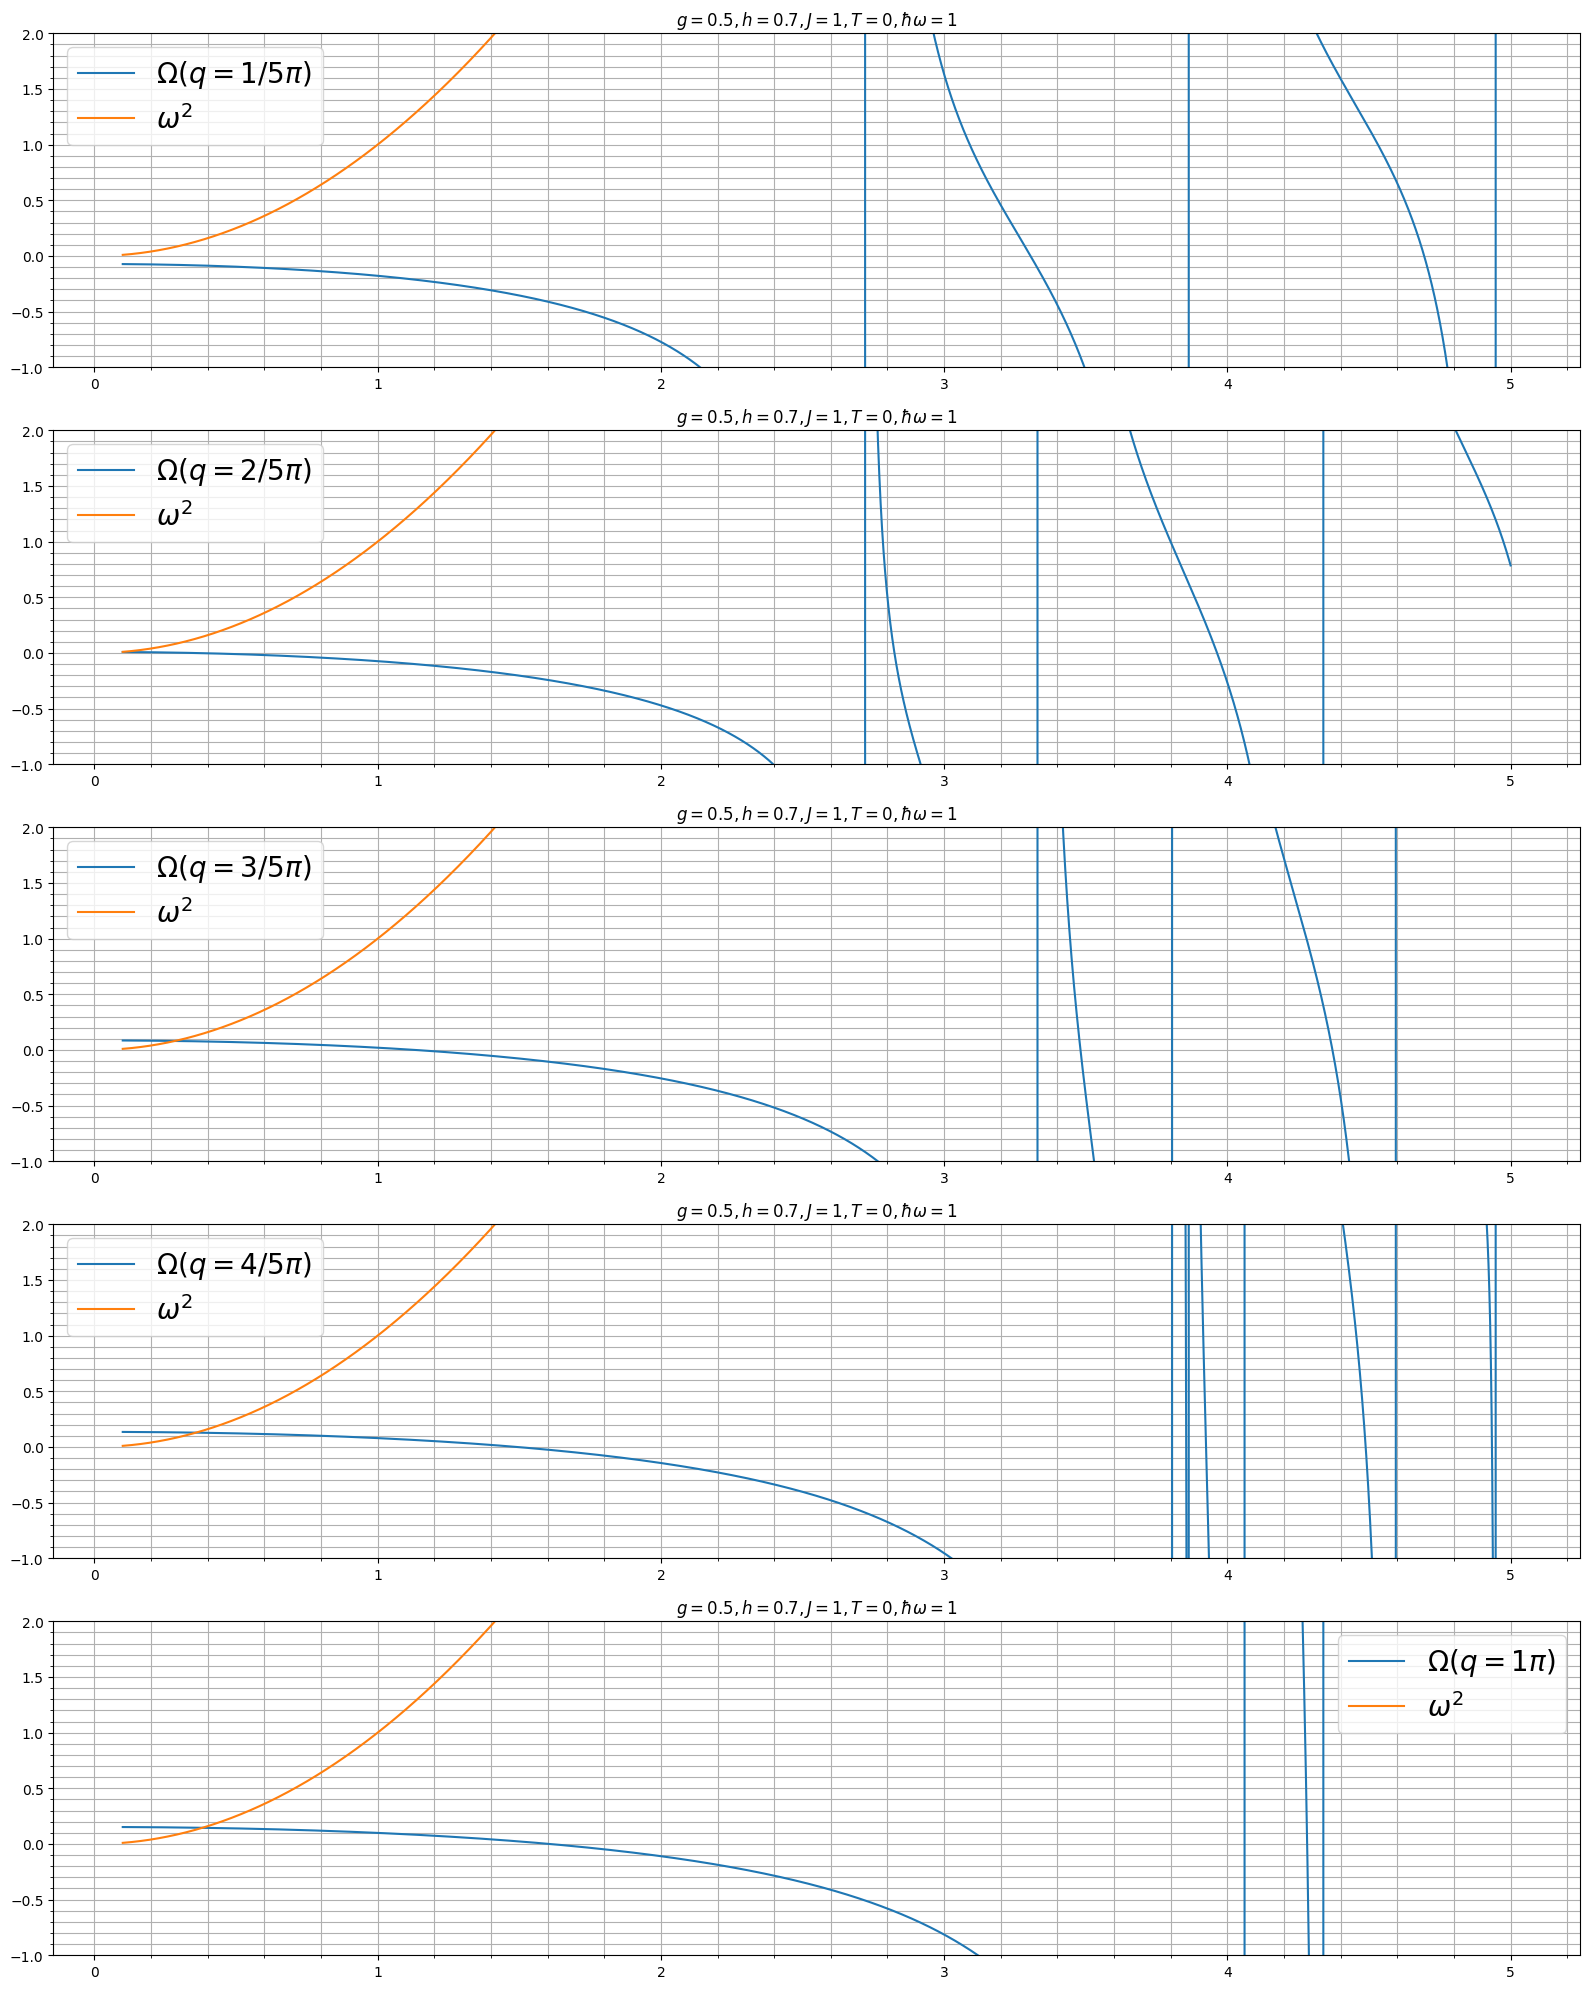

In [39]:
Lq = 10
hw = 1
g1=0.5
h1=0.7
J1=1
T1=0

g2 = 0.5

q_space = 2*np.pi/Lq*np.array( [int(x) for x in (np.arange(-Lq/2,Lq/2)+1) if x != 0] )
print("q space: "+str(q_space))
w_space = np.linspace(0.1,5,50000)

fig, axs = plt.subplots(int(Lq/2),figsize=(16,20))

count = 0
qplus = [q for q in q_space if q > 0]
print("q plus space: "+str(qplus))
for q in qplus:
    axs[count].plot(w_space,hw**2*( 1 + 4*Omega_new(q,w=w_space,L=Lq,T=T1,g=g2,h=h1,J=J1)/hw ),label="$\Omega(q={fq}\pi)$".format(fq=str(Fraction(q/np.pi).limit_denominator(Lq))) )
    axs[count].plot(w_space,w_space**2, label="$\omega^2$")
    axs[count].legend(fontsize=20)
    axs[count].set_title("$g={fg}, h={fh}, J={fJ}, T={fT}, \hbar\omega={fhw}$".format(fg=g2,fh=h1,fJ=J1,fT=T1,fhw=hw), fontsize=12)
    axs[count].minorticks_on()
    axs[count].grid(which='both')
    axs[count].set_ylim(-1,2)
    count += 1

fig.tight_layout()

## Using SciPY root solver

In [16]:
#Root finder:

Lq = 10
hw = 1
g1=0.2
g2=0.5
h1=0.9
J1=1.2
T1=0.01

def ffunctest(w,*args):
    q,Lq,T1,g2,h1,J1,hw = args
    LHS = hw**2*( 1 + 4*Omega(q,w,L=Lq,T=T1,g=g2,h=h1,J=J1)/hw )
    RHS = w**2
    return LHS-RHS

q_space = 2*np.pi/Lq*np.array( [int(x) for x in (np.arange(-Lq/2,Lq/2)+1) if x != 0] )
omega_space = []
for q in q_space:
    sol = opt.fsolve( ffunctest , 1.1 , args=(q,Lq,T1,g2,h1,J1,hw))
    omega_space.append(sol[0])

q_pi = [str(Fraction(x/np.pi).limit_denominator(Lq)) for x in q_space]

In [17]:
from matplotlib.pyplot import legend
import warnings

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

def plot_dispersion(L,hw,g,h,J,T,initial_guess=1, ylim=None):
    q_space = 2*np.pi/L*np.array( [int(x) for x in (np.arange(-L/2,L/2)+1) if x != 0] )
    omega_space = []
    for q in q_space:
        sol = opt.fsolve( ffunctest , initial_guess , args=(q,L,T,g,h,J,hw), xtol=10e-04)
        omega_space.append(sol[0])
        
    q_pi = [str(Fraction(x/np.pi).limit_denominator(L)) for x in q_space]

    fig , ax = plt.subplots(1 , figsize=(10,3))
    ax.plot(q_pi, omega_space, label="$\omega(k)$")
    ax.legend(fontsize=10)
    ax.set_title("$\hbar \omega = 1 , $"+f"L = {L} , g = {g} , h = {h} , J = {J} , T = {T}")
    ax.set_xlabel(f"$q/\pi$")
    ax.set_ylabel("$\omega / \hbar \omega_R$")
    if ylim is not None:
        ax.set_ylim(0,ylim)
    ax.grid(True)
    

/var/folders/tx/8vpyn5_96mdb4fjlz2yv4khw0000gn/T/ipykernel_1642/2288181966.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(np.exp(E/T)+1)


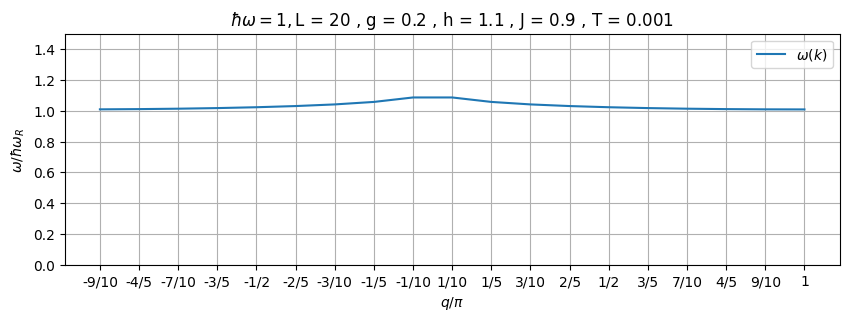

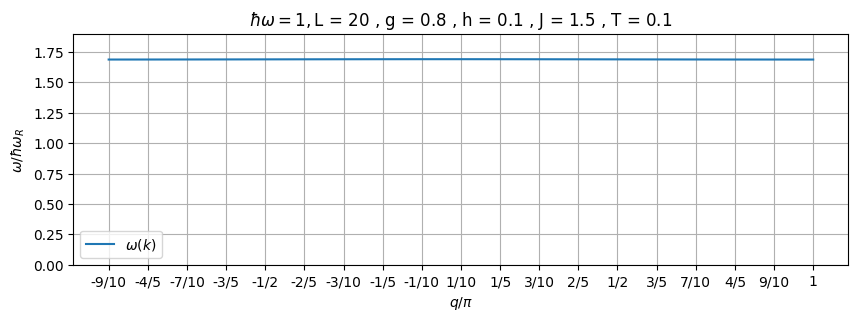

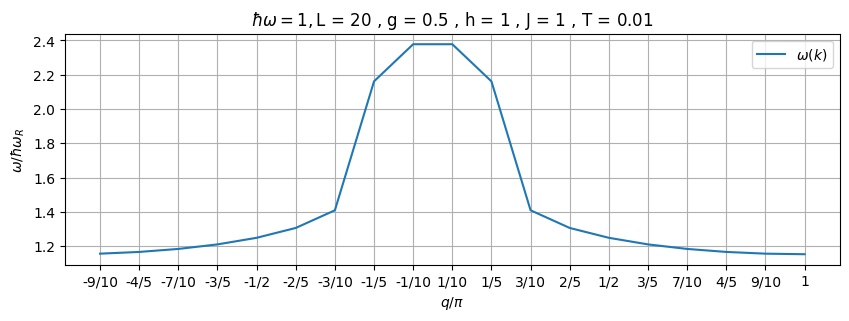

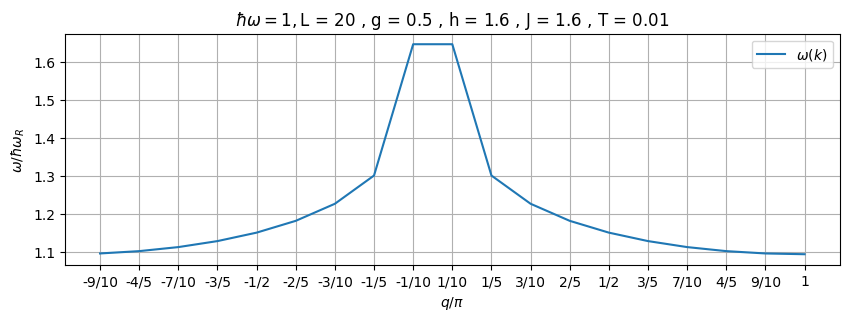

In [18]:
plot_dispersion(L=20,hw=1,g=0.2,h=1.1,J=0.9,T=0.001,initial_guess=1.4, ylim=1.5) #No coupling from Ising - Weak interresonator coup
plot_dispersion(L=20,hw=1,g=0.8,h=0.1,J=1.5,T=0.1,initial_guess=1, ylim=1.9) #Strong coupling from Ising - transverse interresonator coup
plot_dispersion(L=20,hw=1,g=0.5,h=1,J=1,T=0.01,initial_guess=2) #Criticality near q=0 - Everything tuned
plot_dispersion(L=20,hw=1,g=0.5,h=1.6,J=1.6,T=0.01)  #Resonator not tunes to ising params


Text(0, 0.5, '$\\omega / \\hbar \\omega_R$')

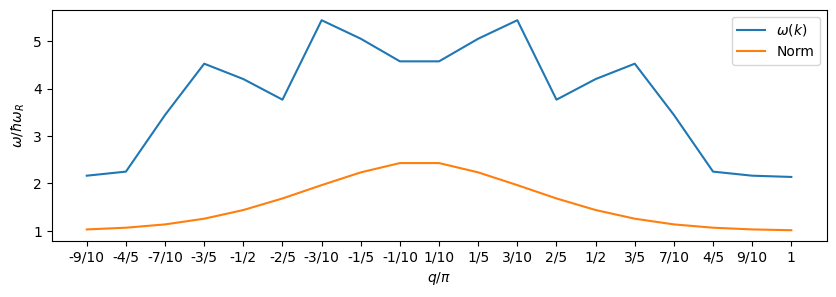

In [19]:
# Strong coupled tuned Ising regime
Lq = 20
hw = 1
g2=1.5
h1=1
J1=1
T1=0.01

q_space = 2*np.pi/Lq*np.array( [int(x) for x in (np.arange(-Lq/2,Lq/2)+1) if x != 0] )
omega_space = []
for q in q_space:
    sol = opt.fsolve( ffunctest , 2+2*g2*gaussian(q,0,2) , args=(q,Lq,T1,g2,h1,J1,hw))
    omega_space.append(sol[0])

q_pi = [str(Fraction(x/np.pi).limit_denominator(Lq)) for x in q_space]

fig , ax = plt.subplots(1 , figsize=(10,3))
ax.plot(q_pi, omega_space, label="$\omega(k)$")
ax.plot(q_pi, 1+g2*gaussian(np.array(q_space),0,1), label="Norm")
ax.legend()
ax.set_xlabel(f"$q/\pi$")
ax.set_ylabel("$\omega / \hbar \omega_R$")


/Users/bjarkehogdall/Documents/Jupyter/Thesis/.venv/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/bjarkehogdall/Documents/Jupyter/Thesis/.venv/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/Users/bjarkehogdall/Documents/Jupyter/Thesis/.venv/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


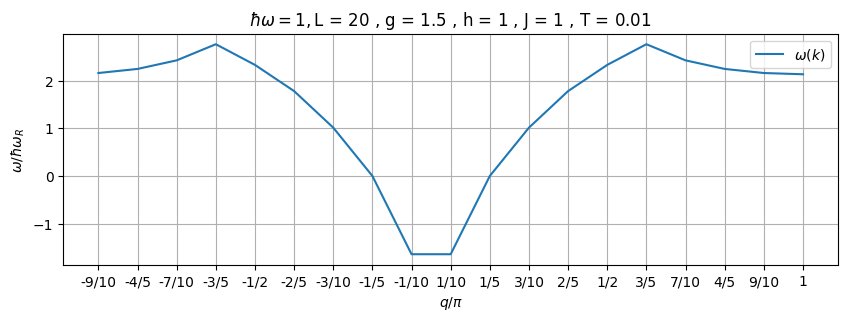

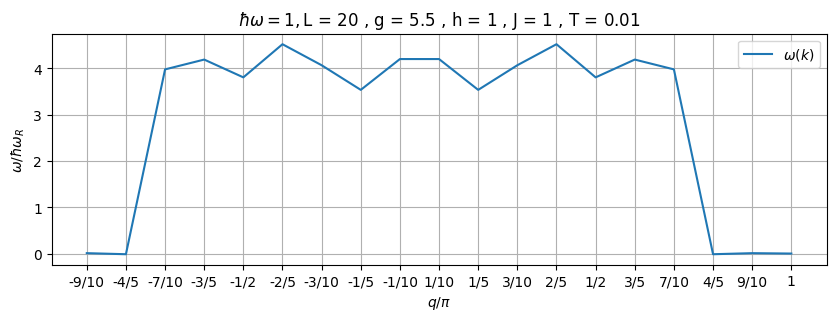

In [20]:
plot_dispersion(L=20,hw=1,g=1.5,h=1,J=1,T=0.01)  #Strong coupled tuned Ising
plot_dispersion(L=20,hw=1,g=5.5,h=1,J=1,T=0.01, initial_guess=4)  #Strong coupling

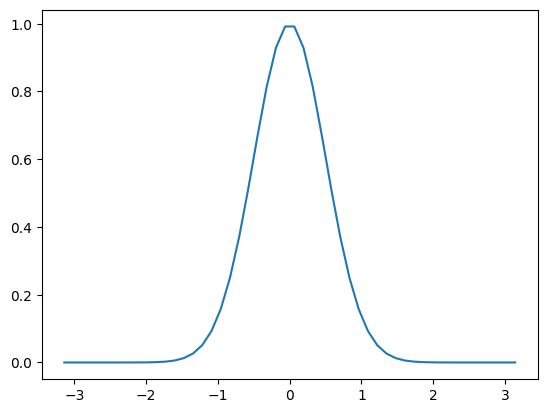

In [21]:
kspace = np.linspace(-np.pi,np.pi)
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
plt.plot(kspace,gaussian(kspace,0,0.5))

## Plotting the saddle point equation 

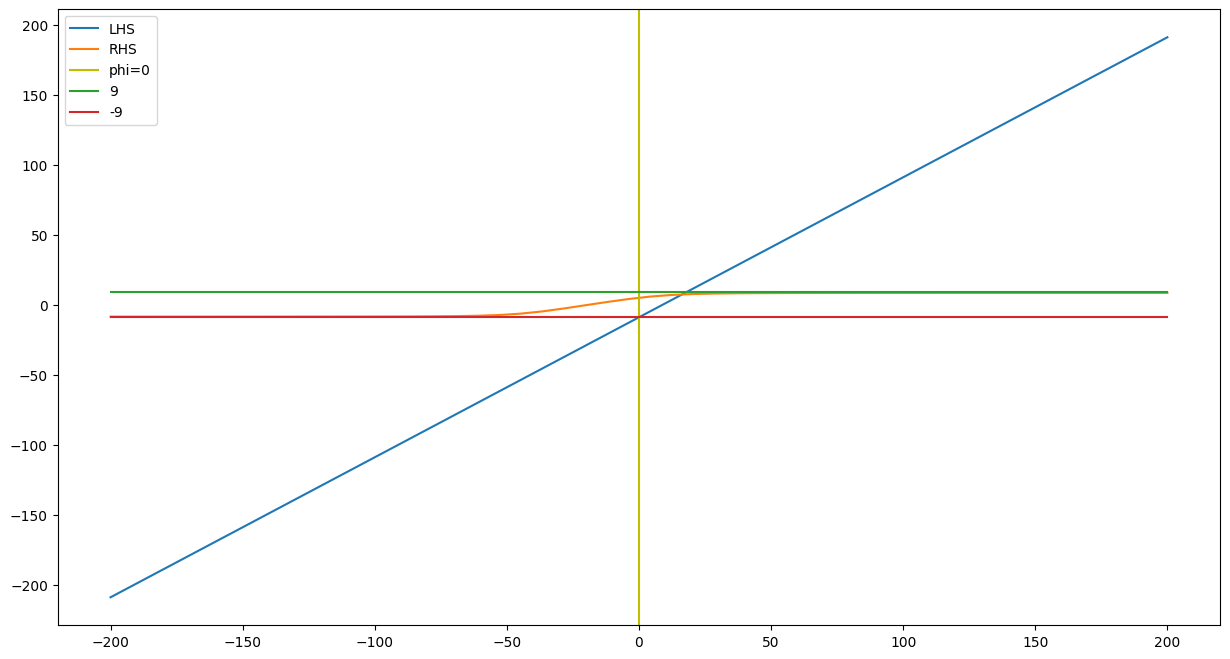

In [22]:
##Saddle point equation

def LHSsp(x,g,T,L,w):
    return x-2*g/w*np.sqrt(L/T)

def ener(x,k,g,T,L,h,J):
    return np.sqrt( (2*h+g/(2*np.sqrt(L/T))*x-2*J*np.cos(k) )**2 + (2*J*np.sin(k))**2 )

def RHSsp(x,g,T,L,w,h,J):
    k_space = 2*np.pi/L*np.array( [int(x) for x in (np.arange(-L/2,L/2)+1) if x != 0] )
    sum = 0
    for k in k_space:
        sum += ( ( 2*h-2*J*np.cos(k)+g/(2*np.sqrt(L/T))*x )/ener(x,k,g,T,L,h,J) )*np.tanh(ener(x,k,g,T,L,h,J)/(2*T))
    return 2*g/(np.sqrt(T*L))*sum


x_space = np.linspace(-200,200)

w=1
g=1
h=1
J=1
L=20
T=1

fig, ax = plt.subplots(1,figsize=(15,8))

ax.plot(x_space, LHSsp(x_space,g,T,L,w),label="LHS")
ax.plot(x_space,RHSsp(x_space,g,T,L,w,h,J),label="RHS")
ax.axvline(x=0, label="phi=0",color="y")
ax.plot(x_space,9*np.ones(50),label="9")
ax.plot(x_space,-9*np.ones(50),label="-9")
ax.legend()

#plt.ylim(-10,10)

### Failed attempt at solving imaginary part of $\Omega_q$'s delta function

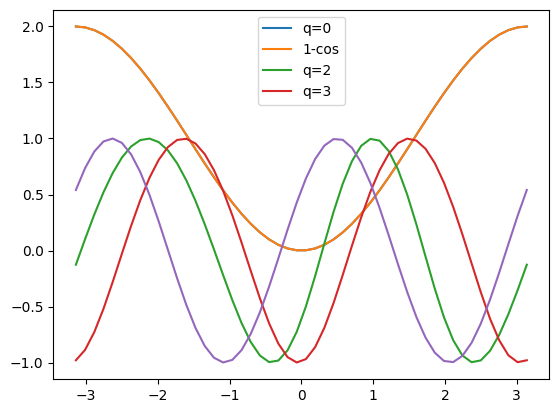

In [16]:
def func1(J,h,k,q):
    return func(k,q,h,J)/(Xi(h,J,k)*Xi(h,J,k-q))
    
k_space = np.linspace(-np.pi,np.pi,50)

plt.plot(k_space,1+func1(1,1,k_space,0), label="q=0")
plt.plot(k_space,abs(1-np.cos(k_space)), label="1-cos")
plt.plot(k_space,func1(1,0.3,k_space,2), label="q=2")
plt.plot(k_space,func1(1,0.3,k_space,3), label="q=3")
plt.plot(k_space,np.cos(2*k_space-1))
plt.legend()

/Users/bjarkehogdall/Documents/Jupyter/Thesis/.venv/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/bjarkehogdall/Documents/Jupyter/Thesis/.venv/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


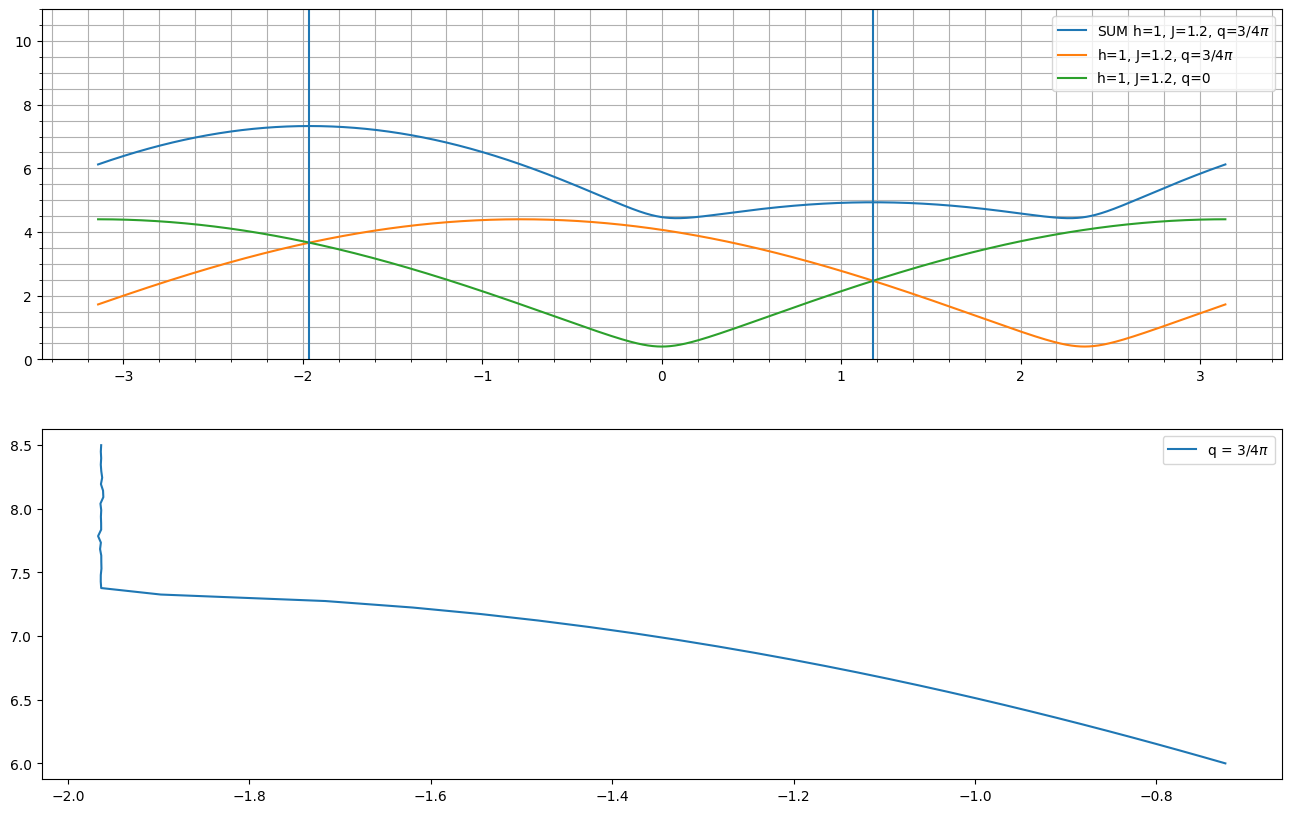

In [18]:
#Find k_0 for delta(omega-xi_k-xi_k-q) for a range of omega

# x between 1 and infty

x = 2
q=np.pi/x
q=2.35619449
h=1
J=1.2

frac = str(Fraction(q/np.pi).limit_denominator(20))
pistr = "$\pi$"

fig, axs = plt.subplots(2,figsize=(16,10))
#k_space = np.linspace(-1,2,5001)
k_space = np.linspace(-np.pi,np.pi,5001)
axs[0].plot(k_space,Xi(h,J,k_space-q)+Xi(h,J,k_space),label=f"SUM h={h}, J={J}, q={frac+pistr}")
axs[0].plot(k_space,Xi(h,J,k_space-q),label=f"h={h}, J={J}, q={frac+pistr}")
axs[0].plot(k_space,Xi(h,J,k_space),label=f"h={h}, J={J}, q=0")
axs[0].vlines(q/2,0,11)
axs[0].vlines(q/2-np.pi,0,11)
axs[0].legend(loc='best')
axs[0].minorticks_on()
axs[0].grid(which="both")
axs[0].set_ylim(0,11)


def rootfunc(k, *args):
    w, h, J, q = args
    return w-Xi(h,J,k)-Xi(h,J,k-q)

omega_space = np.linspace(6,8.5)

root_list = []

for w in omega_space:
    root = opt.fsolve(rootfunc, -1, args=(w,h,J,q))
    root_list.append(root)

axs[1].plot(root_list,omega_space, label="q = "+frac+pistr)
axs[1].legend()

## Plotting $\text{Im}\Omega_q$
Needed implementing a rootsolver that works in the thermodynamic limit of $N\to\infty$

In [7]:
np.seterr(all='raise')

def Xiq(h,J,q):
    energy_squared = 4*((h-J*np.cos(q))**2+(J*np.sin(q))**2)
    return np.sqrt(energy_squared)

#Make error message more informative: If didn't converge -> No values above zero / No values below zero / Other
def root_solver_k(func, gran, args, message=False):
    """returns set of roots for function over a k_space. Returns tuple of (root set,err). err=0 => converged, err=1 => positive/negative, err=2 => no convergence/error"""
    sol_set = set()
    guesses = np.linspace(-np.pi,np.pi,gran)
    for k_guess in guesses:
        root = opt.fsolve(func, k_guess, args=args, full_output=True)
        sol = root[0][0]
        #while sol < -np.pi and sol > -3*np.pi:
        #    sol += 2*np.pi
       # while sol > np.pi and sol < 3*np.pi:
        #    sol -= 2*np.pi
        sol = round(sol,5)
        if root[-2] == 1 and np.abs(sol)<np.pi:
            sol_set.add(sol)
    #Creating error message
    if len(sol_set) == 0:
        mess = "No roots found."
        err = 1
        func_space = func(guesses,*args)
        max, min = np.max(func_space), np.min(func_space)
        if max < 0:
            mess += " Function is negative on entire domain"
        elif min > 0:
            mess += " Function is positive on entire domain"
        else:
            mess += " Root solver didn't converge - other error"
            err = 2
    elif len(sol_set) != 0:
        mess = "Root solver converged"
        err = 0
    if message:
        print(mess)
    return (sol_set,err,mess)

def jacfunc(k,q,h,J):
    try: 
        jac = np.sin(k)/Xiq(h,J,k) + np.sin(k-q)/Xiq(h,J,k-q)
        return jac
    except: 
        frac_q = str(Fraction(q/np.pi).limit_denominator(20))
        frack = str(Fraction(k/np.pi).limit_denominator(20))
        pistr = "$\pi$"
        print(f"An error occured in the delta function denominator at k={frack}"+pistr+f", q={frac_q}"+pistr)
    return 1

#Needs omega>0 and T=0
def impart(q,g,w,h,J,gran , decimal_points=12, convergence_message=1):
    """Convergence message: 0 for no message, 1 for message on error, 2 for prints"""
    if convergence_message==2:
        full_message=True
    else: full_message=False
    kmm = root_solver_k(func=rootfunc, gran=gran, args=(w,h,J,q), message=full_message)
    if convergence_message == 1:
        if kmm[1] == 2:
            print(kmm[2])
    sol = 0
    for k in kmm[0]:
        try:
            sol += ( 1/(abs(jacfunc(k,q,h,J))) )* (func(k,q,h,J)/(Xiq(h,J,k)*Xiq(h,J,k-q)) - 1 )
        except:
            frack = str(Fraction(k/np.pi).limit_denominator(20))
            pistr = "$\pi$"
            print(f"error at k={frack}"+pistr)
    sol = g**2/(h*J)*sol
    return (round(sol, decimal_points),((q,w),kmm[1]))

Testing the rootsolver: Plotting roots

Solve the equation $\omega = \xi_k + \xi_{k-q}$ for k at some $\omega,q$

Root solver converged


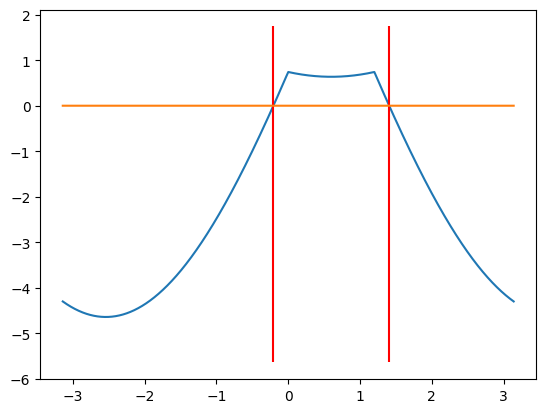

In [24]:
def test_func(k,omega,q,h,J):
    return omega - Xiq(h,J,k) - Xiq(h,J,k-q)

omega = 3
q = 1.2
h = 1
J = 1

sol_set = root_solver_k(test_func,1000,(omega,q,h,J),message=True)

#Plotting
k_space_test = np.linspace(-np.pi,np.pi,10000)
fig_test, ax_test = plt.subplots()
ax_test.plot(k_space_test,test_func(k_space_test,omega,q,h,J))
max, min = np.max(test_func(k_space_test,omega,q,h,J)) , np.min(test_func(k_space_test,omega,q,h,J))
for i in sol_set[0]:
    ax_test.vlines(i,min-1,max+1,colors="red",label=f"root at k0 = {i}")
ax_test.plot(k_space_test,np.zeros(len(k_space_test)),label="0")
#ax_test.legend()

Defining the parameter grid

In [25]:
#define meshgrid

hw = 1
g1=0.1
h1=0.95
J1=1
T1=0

omega_max = 10
omega_min = 0

search_gran = 30

Lq = 40

#Set up meshgrid
omega_space = -np.linspace(-omega_max,-omega_min,num=search_gran)
q_space = 2*np.pi/Lq*np.array( [int(x) for x in (np.arange(-Lq/2,Lq/2)+1) if x != 0] )
qq, ww= np.meshgrid(q_space, omega_space)

#Matrix giving solutions
plot_mat = np.zeros((search_gran,Lq-1))

for i in range(search_gran):
    for j in range(Lq-1):
        w = ww[i,j]
        q = qq[i,j]
        #print(f"q:{q}, w:{w}")
        plot_mat[i,j], err = impart(q=q, g=g1, w=w, h=h1, J=J1, gran=100, convergence_message=1)
        if err[1]==2:
            print(f"error at {err[0]}")

NameError: name 'rootfunc' is not defined

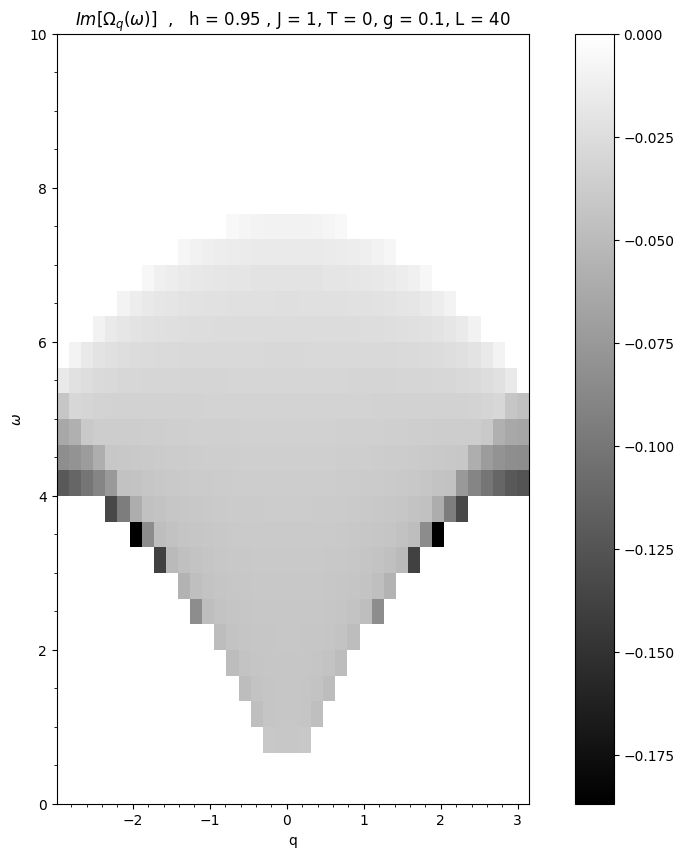

In [180]:
##Plotting the imaginary part of Omega
fig, ax = plt.subplots(figsize=(12,10))

im = ax.imshow(plot_mat , cmap="gray", interpolation="none", extent=[q_space[0],q_space[-1],omega_space[-1],omega_space[0]])
ax.minorticks_on()
#ax.grid(which='both')
ax.set_xlabel("q")
ax.set_ylabel("$\omega$")
ax.set_title("$Im[\Omega_q(\omega)]$" + f"  ,   h = {h1} , J = {J1}, T = 0, g = {round(g1,2)}, L = {Lq}")
fig.colorbar(im)

#plt.legend()
#plt.savefig(f"figures_FI/Omega_imag_part/h={h1},J={J1},T=0,g={g1},L={Lq}.jpg")
plt.show()

#plt.show()
#ax.set_xticks(omega_space)

### Plotting the spectrum on the imaginary part

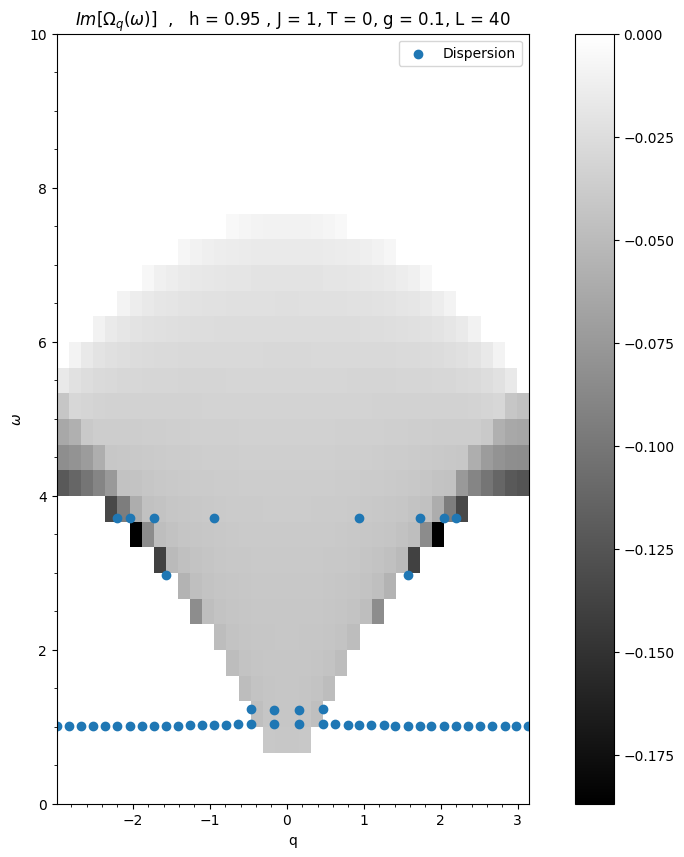

In [27]:
#Examining spectrum when imaginary part is zero

##Finding the dispersion relation 
search_min_disp, search_max_disp = 0.1 , 5
search_gran = search_gran

def ffunctest(w,*args):
    q,Lq,T1,g2,h1,J1,hw = args
    LHS = hw**2*( 1 + 4*Omega(q,w,L=Lq,T=T1,g=g2,h=h1,J=J1)/hw )
    RHS = w**2
    return LHS-RHS

#q_space = 2*np.pi/Lq*np.array( [int(x) for x in (np.arange(-Lq/2,Lq/2)+1) if x != 0] )
q_omega_sols = set()
search_space_disp = np.linspace(search_min_disp, search_max_disp, search_gran)
for q in q_space:
    for s in search_space_disp:
        sol = opt.fsolve( func=ffunctest , x0=s , args=(q,Lq,T1,g1,h1,J1,hw), full_output=True)
        if sol[2] == 1:
            q_omega_sols.add((round(q,2),abs(round(sol[0][0],2))))
        #else: print(f'message: {sol[3]} , at q = {q}, with initial guess {s}')

q_pi = [str(Fraction(x/np.pi).limit_denominator(Lq)) for x in q_space]

##Plotting the imaginary part of Omega
fig, ax = plt.subplots(figsize=(12,10))

im = ax.imshow(plot_mat , cmap="gray", interpolation="none", extent=[q_space[0],q_space[-1],omega_space[-1],omega_space[0]])
ax.minorticks_on()
#ax.grid(which='both')
ax.set_xlabel("q")
ax.set_ylabel("$\omega$")
ax.set_title("$Im[\Omega_q(\omega)]$" + f"  ,   h = {h1} , J = {J1}, T = 0, g = {g1}, L = {Lq}")
fig.colorbar(im)

ks = [x[0] for x in q_omega_sols]
omegas = [x[1] for x in q_omega_sols]

ax.scatter(x=ks,y=omegas, label='Dispersion')
plt.legend()
#plt.savefig(f"figures_FI/Omega_imag_part+spectrum/h={h1},J={J1},T=0,g={g1},L={Lq}.jpg")
plt.show()

#plt.show()
#ax.set_xticks(omega_space)

In [28]:
#Examining spectrum when imaginary part is zero

#Root finder:

search_min, search_max = 0.1 , 5
search_gran = 20

def ffunctest(w,*args):
    q,Lq,T1,g2,h1,J1,hw = args
    LHS = hw**2*( 1 + 4*Omega(q,w,L=Lq,T=T1,g=g2,h=h1,J=J1)/hw )
    RHS = w**2
    return LHS-RHS

#q_space = 2*np.pi/Lq*np.array( [int(x) for x in (np.arange(-Lq/2,Lq/2)+1) if x != 0] )
q_omega_sols = set()
search_space = np.linspace(search_min, search_max, search_gran)
for q in q_space:
    for s in search_space:
        sol = opt.fsolve( func=ffunctest , x0=s , args=(q,Lq,T1,g1,h1,J1,hw), full_output=True)
        if sol[2] == 1:
            q_omega_sols.add((round(q,2),abs(round(sol[0][0],2))))
        #else: print(f'message: {sol[3]} , at q = {q}, with initial guess {s}')

q_pi = [str(Fraction(x/np.pi).limit_denominator(Lq)) for x in q_space]



(-10.0, 10.0)

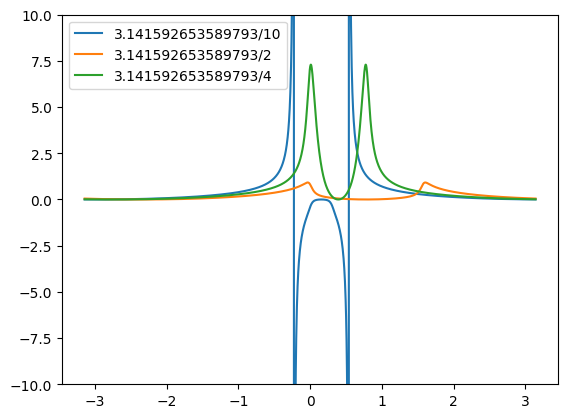

In [36]:
#Testing integrand of Omega_q at 0T assuming real omega

q=np.pi
h=0.95
J=1
w=1.5

def deltafunc(k,q,h,J,w):
    res = -func(k,q,h,J)*(1/(Xiq(h,J,k)*( Xiq(h,J,k-q)**2-(Xiq(h,J,k)+w)**2 ))+1/(Xiq(h,J,k-q)*( Xiq(h,J,k)**2-(Xiq(h,J,k-q)-w)**2 )) ) - (Xiq(h,J,k)+w)/(Xiq(h,J,k-q)**2-(Xiq(h,J,k)+w)**2) - (Xiq(h,J,k-q)-w)/(Xiq(h,J,k)**2-(Xiq(h,J,k-q)-w)**2)
    return res

k_plot_space = np.linspace(-np.pi,np.pi,2000)
fig,ax=plt.subplots()
ax.plot(k_plot_space, deltafunc(k_plot_space,q/10,h,J,w),label=f'{q}/10')
ax.plot(k_plot_space, deltafunc(k_plot_space,q/2,h,J,w),label=f'{q}/2')
ax.plot(k_plot_space, deltafunc(k_plot_space,q/4,h,J,w),label=f'{q}/4')
#ax.vlines(x=0, ymin=-10, ymax=10, colors='red')
ax.legend()
ax.set_ylim(-10,10)

## Plotting the linearized spectrum

In [37]:
#Linearized spectrum

def innerfunc(g,J,w,v,q):
    f = 16*(g**2)/v*( (J**2*np.cos(w/(2*v))*(np.cos(w/(2*v))-np.cos(q/2))) / (w**2 - v**2*q**2) - 1 )
    return f

def first_term(g,q,w,kc,v,J):
    if ( w > v*q and w<2*v*kc-v*q ):
        return 2*innerfunc(g,J,w,v,q)
    elif ( w > 2*v*kc-v*q and w < 2*v*kc+v*q ) :
        return innerfunc(g,J,w,v,q)
    else: return 0

from scipy import integrate
def integralq(J,q,v):
    def intfunc(k,J,q,v):
        return func(k,q,J,J)/(v**2*k*(k-q)) - 1
    Intq = integrate.quad(func=intfunc, a=0, b=q, args=(J,q,v))[0]
    return Intq

def delta_term(w,v,q,g,J):
    if w == v*q:
        return g**2*integralq(J,q,v)
    else: return 0

def appimpart(q,w,kc,v,J,g):
    return first_term(g,q,w,kc,v,J) + delta_term(w,v,q,g,J)

In [38]:
#define meshgrid

hw = 1
g1=1/5*15/2
J1=1
kc=np.pi

v0=J1*2
v1=4*J1/kc


omega_max = 12
omega_min = 0

search_gran = 500

Lq = 100    # number of sites

#Set up meshgrid
omega_space = -np.linspace(-omega_max,-omega_min,num=search_gran)
q_space = 2*np.pi/Lq*np.array( [int(x) for x in (np.arange(-Lq/2,Lq/2)+1) if x != 0] )      # q_space of -pi to pi
q_space = q_space[int(Lq/2):]       #Take q_space only for q>0
print(f"q min: {q_space[0]} , q max: {q_space[-1]}")
qq, ww= np.meshgrid(q_space, omega_space)       #Create qq matrix with q0 ... qmax and omega matrix of wmax down to wmin

#Matrix giving solutions
plot_mat = np.zeros((search_gran,len(q_space)))

for i in range(search_gran):
    for j in range(len(q_space)):
        w = ww[i,j]
        q = qq[i,j]
        #print(f"q:{q}, w:{w}")
        plot_mat[i,j] =  appimpart(q=q, w=w, kc=kc, v=v0, J=J1, g=g1)
        # if plot_mat[i,j] < -2:
        #     plot_mat[i,j] = -2

q min: 0.12566370614359174 , q max: 3.1415926535897936


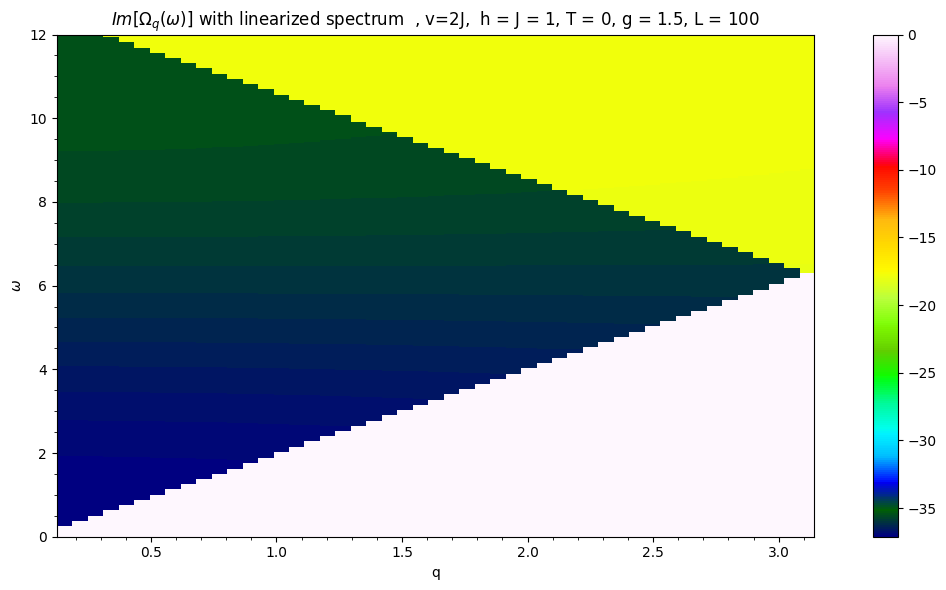

In [39]:
##Plotting the imaginary part of Omega
fig2, ax2 = plt.subplots(figsize=(12,6))

im2 = ax2.imshow(plot_mat , cmap="gist_ncar", interpolation="none", extent=[q_space[0],q_space[-1],omega_space[-1],omega_space[0]], aspect=1/6)
ax2.minorticks_on()
#ax.grid(which='both')
ax2.set_xlabel("q")
ax2.set_ylabel("$\omega$")
ax2.set_title("$Im[\Omega_q(\omega)]$" + " with linearized spectrum" + f"  , v=2J,  h = J = {J1}, T = 0, g = {round(g1,2)}, L = {Lq}")
fig2.colorbar(im2)

#plt.legend()
plt.savefig(f"figures_FI/linear_spectrum/linearized spectrum imOmegaq with J={J1}, g={g1}, v=2J.jpg")
fig2.tight_layout()
plt.show()

#plt.show()
#ax.set_xticks(omega_space)

In [40]:
x0 = 0.5+0j
for i in range(20):
    x1 = cm.sqrt(1+cm.e**(-2*x0)+1j*cm.e**(-4*x0))
    print(x1)
    errRe = abs(x1.real-x0.real)
    errIm = abs(x1.imag-x0.imag)
    x0=x1
    print(f"Re err: {errRe} , Im err: {errIm}")

(1.1709904954478634+0.057786670243148146j)
Re err: 0.6709904954478634 , Im err: 0.057786670243148146
(1.0476707550230988-0.0009972782160166669j)
Re err: 0.12331974042476457 , Im err: 0.05878394845916481
(1.0597265043068678+0.00725715987272399j)
Re err: 0.012055749283768957 , Im err: 0.008254438088740657
(1.0585552056957308+0.005986563584194578j)
Re err: 0.0011712986111369617 , Im err: 0.0012705962885294119
(1.0586573010907077+0.006161419775575504j)
Re err: 0.00010209539497685327 , Im err: 0.00017485619138092514
(1.0586500377522396+0.0061388137859955125j)
Re err: 7.263338468010971e-06 , Im err: 2.2605989579991062e-05
(1.0586502975756413+0.006141585869690586j)
Re err: 2.5982340168262397e-07 , Im err: 2.7720836950732852e-06
(1.058650337953233+0.006141261897338764j)
Re err: 4.037759171460209e-08 , Im err: 3.2397235182144574e-07
(1.0586503251344335+0.006141297970275526j)
Re err: 1.2818799577374307e-08 , Im err: 3.607293676179818e-08
(1.0586503275147163+0.006141294164256691j)
Re err: 2.38028

## Plotting $\text{Re}\Omega_q$ as a grid
Similar approach to $\text{Im}\Omega_q$ but now don't need root solver so we do it for some L

When simply not adding the exception, can we be sure that there are no infinites when the NR converge?

In [208]:
def ReOmegaT0(q,w,L,g,h,J):
    n_space = 2*np.arange(1-L/2,L/2+1)-1
    k_space = np.pi/L * n_space
    #print("k= " + str(k_space))
    sum = 0
    for k in k_space:
        # print(k)
        fails = 0
        try:
            sum += (
                (
                ( func(k,q,h,J) ) / ( Xiq(h,J,k)*( Xiq(h,J,k-q)**2 - ( Xiq(h,J,k)+w )**2 ) )
            ) + (
                ( func(k,q,h,J) ) / ( Xiq(h,J,k-q)*( Xiq(h,J,k)**2 - (Xiq(h,J,k-q)-w)**2 ) )
            ) + (
                ( Xiq(h,J,k) + w ) / ( Xiq(h,J,k-q)**2 - ( Xiq(h,J,k) + w )**2 )
            ) + (
                ( Xiq(h,J,k-q) - w ) / ( Xiq(h,J,k)**2 - (Xiq(h,J,k-q) - w)**2 )
            ) )
        except Exception as e:
            fails += 1
            print(f"Exception at q:{q}, k={k}, w={w} : {e}")
    if fails==len(k_space):
        print("All arguments failed")
    return -4*g**2 / L * sum

Testing if there are zeros in the argument of the sum:

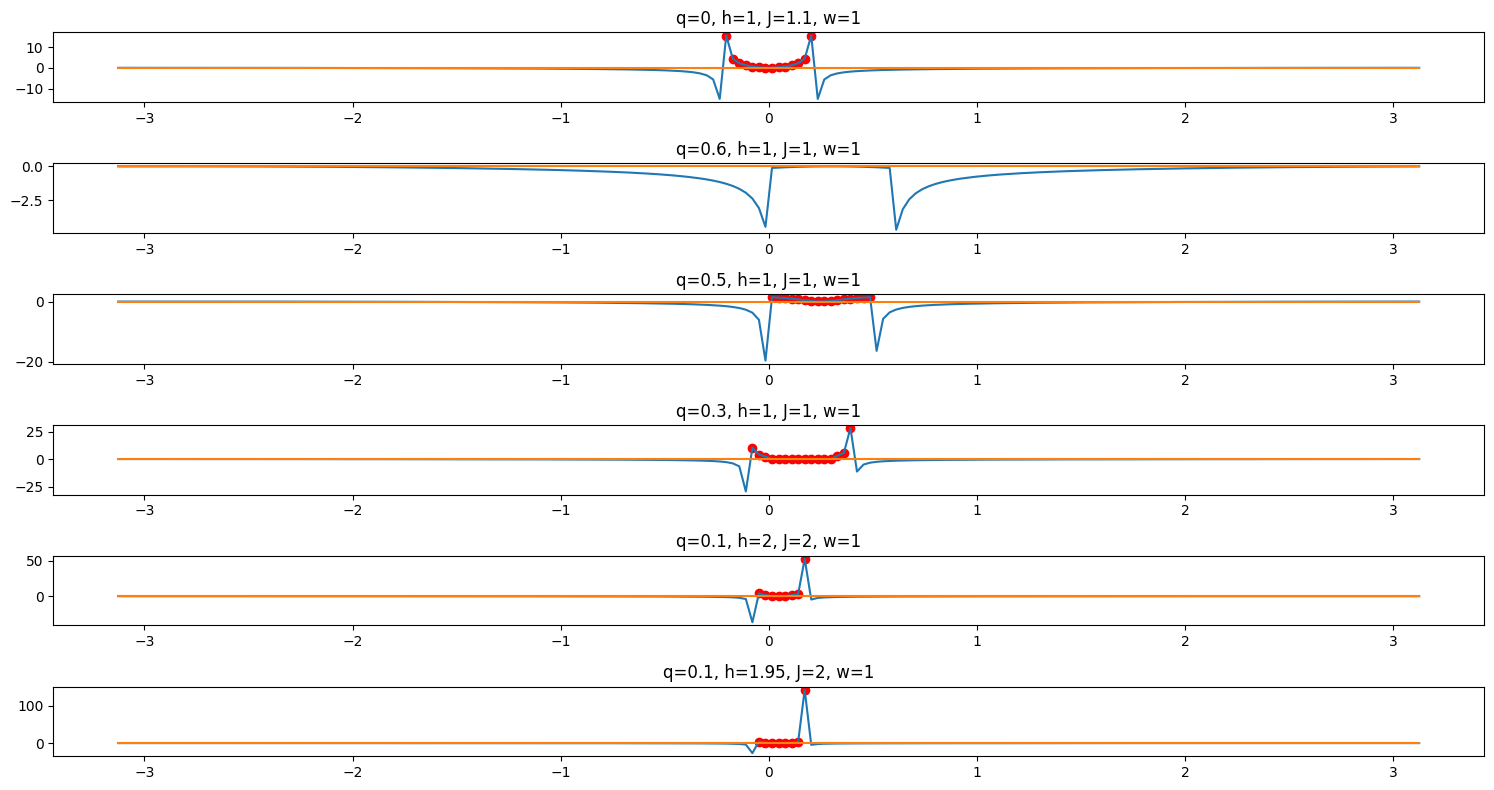

In [243]:
L=200
n_space = 2*np.arange(1-L/2,L/2+1)-1
k_space = np.pi/L * n_space
def sum_argument(k,q,h,J,w):
    argum = (
                (
                ( func(k,q,h,J) ) / ( Xiq(h,J,k)*( Xiq(h,J,k-q)**2 - ( Xiq(h,J,k)+w )**2 ) )
            ) + (
                ( func(k,q,h,J) ) / ( Xiq(h,J,k-q)*( Xiq(h,J,k)**2 - (Xiq(h,J,k-q)-w)**2 ) )
            ) + (
                ( Xiq(h,J,k) + w ) / ( Xiq(h,J,k-q)**2 - ( Xiq(h,J,k) + w )**2 )
            ) + (
                ( Xiq(h,J,k-q) - w ) / ( Xiq(h,J,k)**2 - (Xiq(h,J,k-q) - w)**2 )
            ) )
    return argum
plot_params=[(0,1,1.1,1),(0.6,1,1,1),(0.5,1,1,1),(0.3,1,1,1),(0.1,2,2,1),(0.1,1.95,2,1)]
fig_arg, ax_args = plt.subplots(len(plot_params),figsize=(15,8))
for i in range(len(plot_params)):
    params = plot_params[i]
    for j in k_space:
        arg = sum_argument(j,*params)
        if arg >= 0:
            ax_args[i].scatter(j,arg,marker="o",c="red")
    ax_args[i].plot(k_space,sum_argument(k_space,*params))
    ax_args[i].plot(k_space,np.zeros(L))
    ax_args[i].set_title(f"q={params[0]}, h={params[1]}, J={params[2]}, w={params[3]}")
fig_arg.tight_layout()

What we see is that the argument of the sum in the real part of $\Omega_q(\omega)$ will have some zeros which will cause the code to return a divide by zero error. I think at least as the argument crosses zero.

q space/pi: [0.31415927 0.9424778  1.57079633 2.19911486 2.82743339]


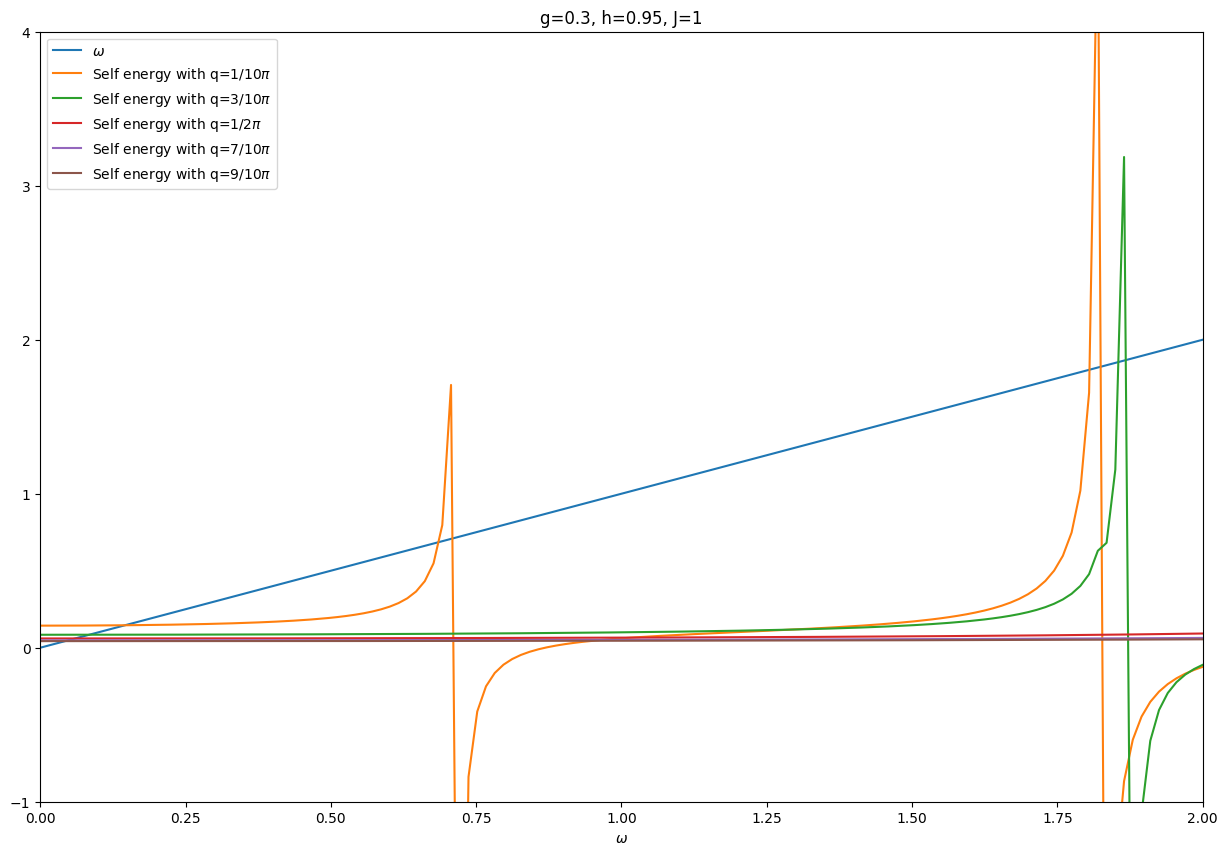

In [42]:
#Plot self energy

#params
g=0.3
L=10
h=0.95
J=1

#Define q_space > 0
n_space = 2*np.arange(1-L/2,L/2+1)-1
q_space = np.pi/L * n_space
q_space = q_space[q_space > 0]

Nw = 400
omega_space = np.linspace(0,6,Nw)

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(omega_space,omega_space, label="$\omega$")
ax.set_xlabel('$\omega$')
ax.set_title(f'g={g}, h={h}, J={J}')

q_label = [str(Fraction(x/np.pi).limit_denominator(L)) for x in q_space]
print(f'q space/pi: {q_space}')

for i in range(len(q_space)):
    #print(q_space[i])
    replot = []
    for w in omega_space:
        q = q_space[i]
        #print(q)
        sigma = ReOmegaT0(q,w,L,g,h,J)
        #print(sigma)
        replot.append(sigma)
    ax.plot(omega_space,replot,label=f"Self energy with q={q_label[i]}"+"$\pi$")

ax.set_ylim((-1,4))
ax.set_xlim(0,2)
ax.legend()



In [43]:
#define meshgrid

hw = 1
g1=2/10
h1=1
J1=1
T1=0

omega_max = 8
omega_min = 0.1

search_gran = 100

Lq = 100

#Set up meshgrid
omega_space = -np.linspace(-omega_max,-omega_min,num=search_gran)
q_space = 2*np.pi/Lq*np.array([x.astype(int) for x in (np.arange(-Lq/2,Lq/2)+1) if x != 0])
qq, ww= np.meshgrid(q_space, omega_space)

#Matrix giving solutions
plot_mat = np.zeros((search_gran,Lq-1))

for i in range(search_gran):
    for j in range(Lq-1):
        w = ww[i,j]
        q = qq[i,j]
        #print(f"q:{q}, w:{w}")
        plot_mat[i,j] = ReOmegaT0(q=q, g=g1, w=w, h=h1, J=J1, L=Lq)

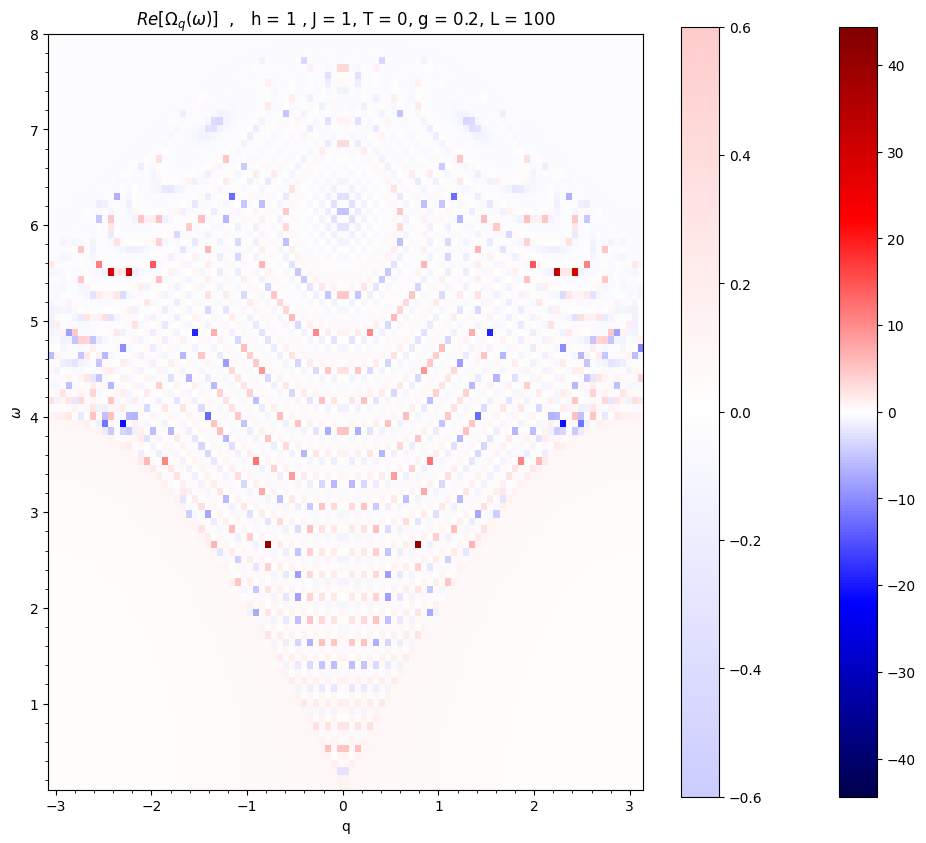

In [44]:
##Plotting the imaginary part of Omega
fig, ax = plt.subplots(figsize=(12,10))

#For colormap
#vmax=0.6
vmax = abs(np.amax(plot_mat))

im = ax.imshow(plot_mat , cmap="seismic", interpolation="none", extent=[q_space[0],q_space[-1],omega_space[-1],omega_space[0]], vmin=-vmax,vmax=vmax)
im2 = ax.imshow(plot_mat , cmap="bwr", interpolation="none", extent=[q_space[0],q_space[-1],omega_space[-1],omega_space[0]], vmin=-0.6,vmax=0.6, alpha=0.2)
ax.minorticks_on()
#ax.grid(which='both')
ax.set_xlabel("q")
ax.set_ylabel("$\omega$")
ax.set_title("$Re[\Omega_q(\omega)]$" + f"  ,   h = {h1} , J = {J1}, T = 0, g = {round(g1,2)}, L = {Lq}")
fig.colorbar(im)
fig.colorbar(im2)

#plt.legend()
plt.savefig(f"figures_FI/Omega_Real_part/Self energy at: h = {h1} , J = {J1}, T = 0, g = {g1}, L = {Lq}.png")
plt.show()

#plt.show()
#ax.set_xticks(omega_space)

## Trying an iterative method

In [45]:
#Iterative methods

w0 = 1
max_iter = 100
tol = 1E-7
dec = 5

L=20
g=0.2
h=0.5
J=1
q=3.0787608


def iterfunc(w,q,h,J,g):
    return 1+2*ReOmegaT0(q=q,w=w,L=L,g=g,h=h,J=J)

def fix_point_ite(func,args: tuple,w0,max_iter=100,tol=1E-7,dec=5,verbose=False,print_end=True):
    w = w0
    if verbose:
        print(f"k = {0} , w = {round(w,dec)}")
    for k in range(1,max_iter):
        w_old = w
        w = func(w_old,*args)
        err = abs(w-w_old)
        if verbose:
            print(f"k = {k} , w = {round(w,dec)} , err = {round(err,dec)}")
        if err < tol:
            break
        if print_end:
            print(f"didn't converge: err = {err}")
    return(w)

test = fix_point_ite(iterfunc, (q,h,J,g), w0=1,verbose=True)
print(test)

k = 0 , w = 1
k = 1 , w = 1.07218 , err = 0.07218
didn't converge: err = 0.0721804441208278
k = 2 , w = 1.07287 , err = 0.00068
didn't converge: err = 0.00068487599323519
k = 3 , w = 1.07287 , err = 1e-05
didn't converge: err = 6.791569223452143e-06
k = 4 , w = 1.07287 , err = 0.0
1.0728721790599285


# Plotting the spectrum of the collective excitation

Breaks down for $J=h$

In [40]:
#Plot spectrum

#params
g=0.01
L=500
h=1
J=1

#Define q_space
n_space = 2*np.arange(1-L/2,L/2+1)-1
q_space = np.pi/L * n_space

def q_space_gen(L):
    return [2*np.pi*n/L for n in range(1-L/2,L/2+1)]

q_label = [str(Fraction(x/np.pi).limit_denominator(L)) for x in q_space]
#print(f'q space/pi: {q_space}')

### Using fixed point iteration

Very bad convergence

didn't converge: err = 0.01663792350641824
didn't converge: err = 3.4342018267796703e-05
didn't converge: err = 0.016640365578315164
didn't converge: err = 3.4359335743472386e-05
didn't converge: err = 0.016645250353261698
didn't converge: err = 3.439399792148912e-05
didn't converge: err = 0.01665257909316331
didn't converge: err = 3.444605939129097e-05
didn't converge: err = 0.01666235368990665
didn't converge: err = 3.4515602186369065e-05
didn't converge: err = 0.01667457666418004
didn't converge: err = 3.460273603783648e-05
didn't converge: err = 0.016689251163878538
didn't converge: err = 3.470759865065176e-05
didn't converge: err = 0.01670638096203092
didn't converge: err = 3.4830356086201775e-05
didn't converge: err = 0.016725970454302574
didn't converge: err = 3.4971203210387714e-05
didn't converge: err = 0.016748024655921734
didn't converge: err = 3.513036423807847e-05
didn't converge: err = 0.01677254919813076
didn't converge: err = 3.5308093216501746e-05
didn't converge: err 

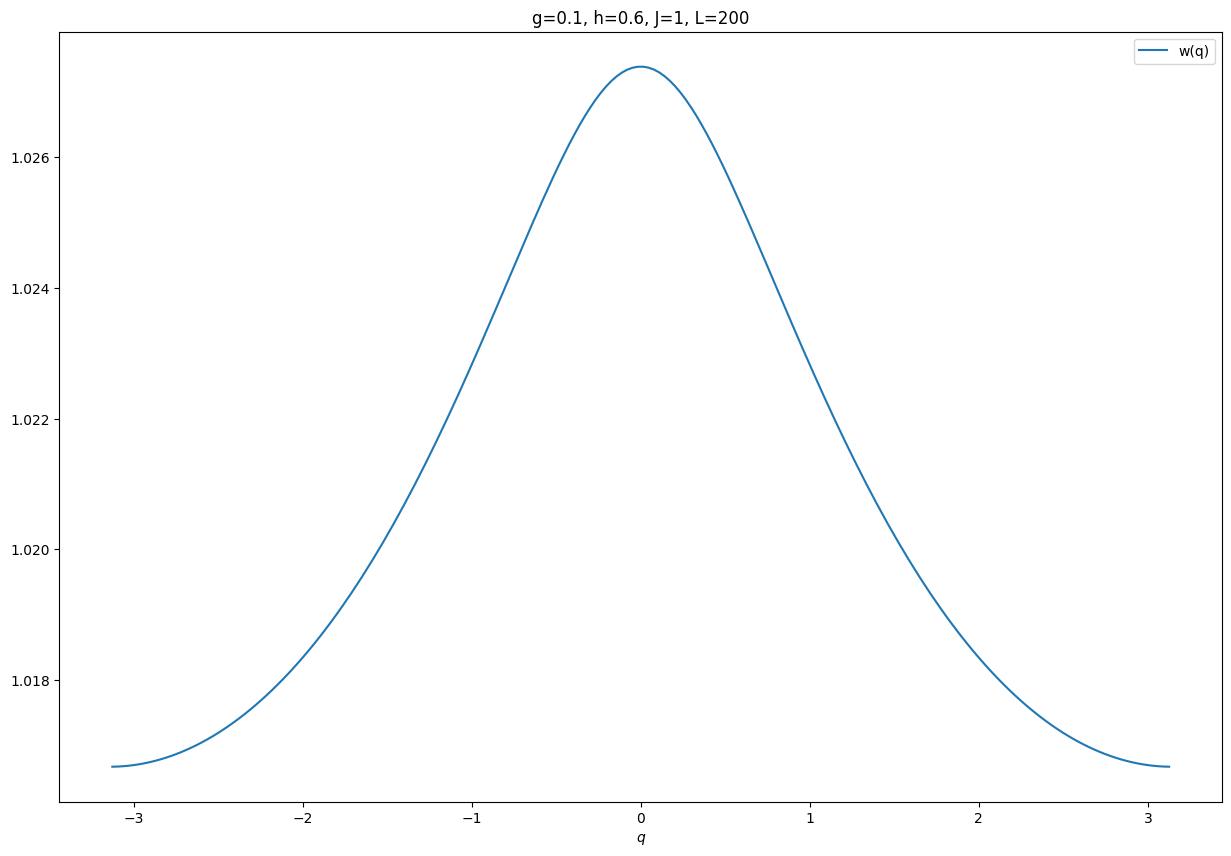

In [47]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlabel('$q$')
ax.set_title(f'g={g}, h={h}, J={J}, L={L}')

w_arr=[]
for i in range(len(q_space)):
    #print(q_space[i])
    q = q_space[i]
    #print(q)
    wq = fix_point_ite(iterfunc,args=(q,h,J,g),w0=1, max_iter=200)
    #print(wq)
    #print(sigma)
    w_arr.append(wq)

ax.plot(q_space,w_arr,label=f"w(q)")

#ax.set_ylim((0,1.2))
ax.legend()
plt.show()


### Using the Newton-Raphson method

Exception at q:-3.135309468282614, k=-3.135309468282614, w=[1] : invalid value encountered in divide
Exception at q:-3.135309468282614, k=-3.135309468282614, w=[1.] : invalid value encountered in divide
Exception at q:-3.135309468282614, k=-3.135309468282614, w=[1.] : invalid value encountered in divide
Exception at q:-3.135309468282614, k=-3.135309468282614, w=[1.00000001] : invalid value encountered in divide
Exception at q:-3.135309468282614, k=-3.135309468282614, w=[1.00006549] : invalid value encountered in divide
Exception at q:-3.135309468282614, k=-3.135309468282614, w=[1.00006549] : invalid value encountered in divide
Exception at q:-3.1227430976682546, k=-3.1227430976682546, w=[1] : invalid value encountered in divide
Exception at q:-3.1227430976682546, k=-3.1227430976682546, w=[1.] : invalid value encountered in divide
Exception at q:-3.1227430976682546, k=-3.1227430976682546, w=[1.] : invalid value encountered in divide
Exception at q:-3.1227430976682546, k=-3.1227430976682

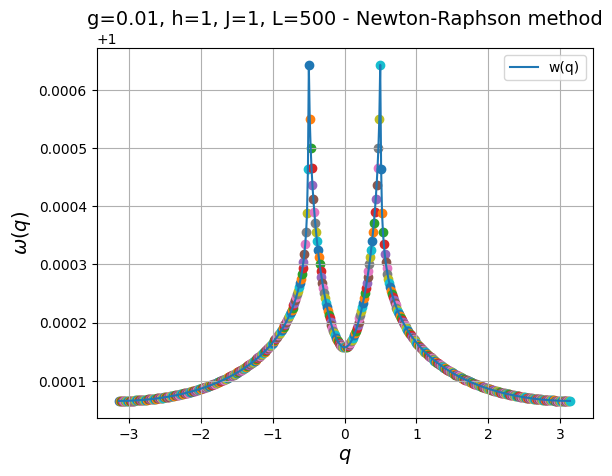

In [269]:
#compare to Newton-Raphson

fig, axNR = plt.subplots()
axNR.set_xlabel('$q$',fontsize=14)
axNR.set_ylabel("$\omega(q)$",fontsize=14)
axNR.set_title(f'g={g}, h={h}, J={J}, L={L} - Newton-Raphson method',fontsize=14)

def NRfunc(w,q,h,J,g):
    return 1+2*ReOmegaT0(q=q,w=w,L=L,g=g,h=h,J=J)-w

w_arrNR=[]
for i in range(len(q_space)):
    #print(q_space[i])
    q = q_space[i]
    #print(q)
    sol = opt.fsolve(func=NRfunc,x0=1, args=(q,h,J,g), full_output=True)
    # try: sol = opt.fsolve(func=NRfunc,x0=1, args=(q,h,J,g), full_output=True)
    # except Exception as e: print(f"{e}, at q={q}")
    wq = sol[0][0]
    conved = sol[2]
    if conved != 1:
        frac = str(Fraction(q/np.pi).limit_denominator(20))
        print(f"NR-method didnt converge at q={frac}")
        axNR.scatter(q,wq, label="didn't converge", marker="x", color="red")
    else: axNR.scatter(q,wq)
    #print(wq)
    #print(sigma)
    w_arrNR.append(wq)

axNR.plot(q_space,w_arrNR,label=f"w(q)")

#ax.set_ylim((0,1.2))
axNR.legend()
axNR.grid()
#axNR.set_ylim(1,1.13)
plt.savefig(f"figures_FI/Spectrum/Fieldh={h}_J={J}.png")
plt.show()

In [255]:
def solve_w_arr(q_space,h,J,g,ax=False,w0=1,show_convergence=True, wtol=1.5e-8):
    w_arrNR = []
    conv = 0
    for i in range(len(q_space)):
        q = q_space[i]
        sol = opt.fsolve(func=NRfunc,x0=w0, args=(q,h,J,g), full_output=True, xtol=wtol)
        wq = sol[0][0]
        conved = sol[2]
        if conved != 1 and show_convergence:
            conv += 1
            frac = str(Fraction(q/np.pi).limit_denominator(20))
            print(f"NR-method didnt converge at q={frac}")
            if ax:
                ax.scatter(q,wq, label="didn't converge" if conv == 1 else "_nolegend_", marker="x", color="red")
        w_arrNR.append(wq)
    return w_arrNR

def return_gamma(q_space, w_arrNR, g, h, J, gran=1000, message=1):
    gamma = []
    for i in range(len(q_space)):
        w = w_arrNR[i]
        q = q_space[i]
        imp, err = impart(q=q, g=g, w=w, h=h, J=J, gran=gran, convergence_message=message)
        if err[1] == 2:
            print(err[2])
        gamma.append(imp)
    return gamma

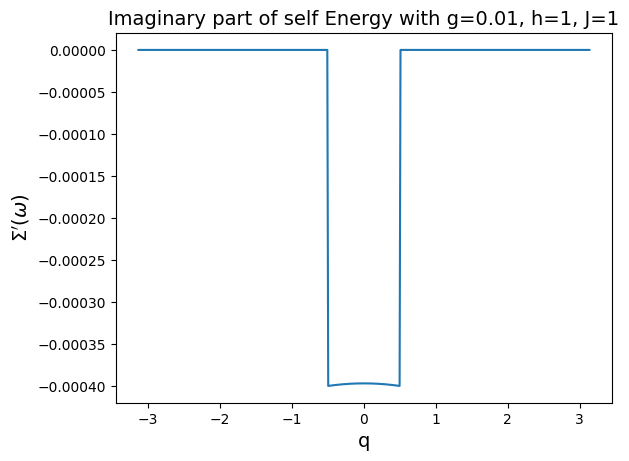

In [270]:
gamma = []

for i in range(len(q_space)):
    w = w_arrNR[i]
    q = q_space[i]
    imp, err = impart(q=q, g=g, w=w, h=h, J=J, gran=100)
    if err[1] == 2:
        print(err[2])
    gamma.append(imp)

fig, axim = plt.subplots()
axim.set_title(f"Imaginary part of self Energy with g={g}, h={h}, J={J}",fontsize=14)
axim.set_xlabel("q",fontsize=14)
axim.set_ylabel("$\Sigma'(\omega)$",fontsize=14)
axim.plot(q_space,gamma)
#axim.set_ylim(-5*g**2,g**2)
plt.savefig(f"figures_FI/imaginary_part_self_energy/h={h}_J={J}.png")

### Make into functions to make multiple plots

1
Exception at q:-3.1258846903218442, k=-3.1258846903218442, w=[1.001] : invalid value encountered in divide
Exception at q:-3.1258846903218442, k=-3.1258846903218442, w=[1.001] : invalid value encountered in divide
Exception at q:-3.1258846903218442, k=-3.1258846903218442, w=[1.001] : invalid value encountered in divide
Exception at q:-3.1258846903218442, k=-3.1258846903218442, w=[1.00100001] : invalid value encountered in divide
Exception at q:-3.1258846903218442, k=-3.1258846903218442, w=[1.00000065] : invalid value encountered in divide
Exception at q:-3.1258846903218442, k=-3.1258846903218442, w=[1.00000065] : invalid value encountered in divide
Exception at q:-3.0944687637859465, k=-3.0944687637859465, w=[1.001] : invalid value encountered in divide
Exception at q:-3.0944687637859465, k=-3.0944687637859465, w=[1.001] : invalid value encountered in divide
Exception at q:-3.0944687637859465, k=-3.0944687637859465, w=[1.001] : invalid value encountered in divide
Exception at q:-3.09

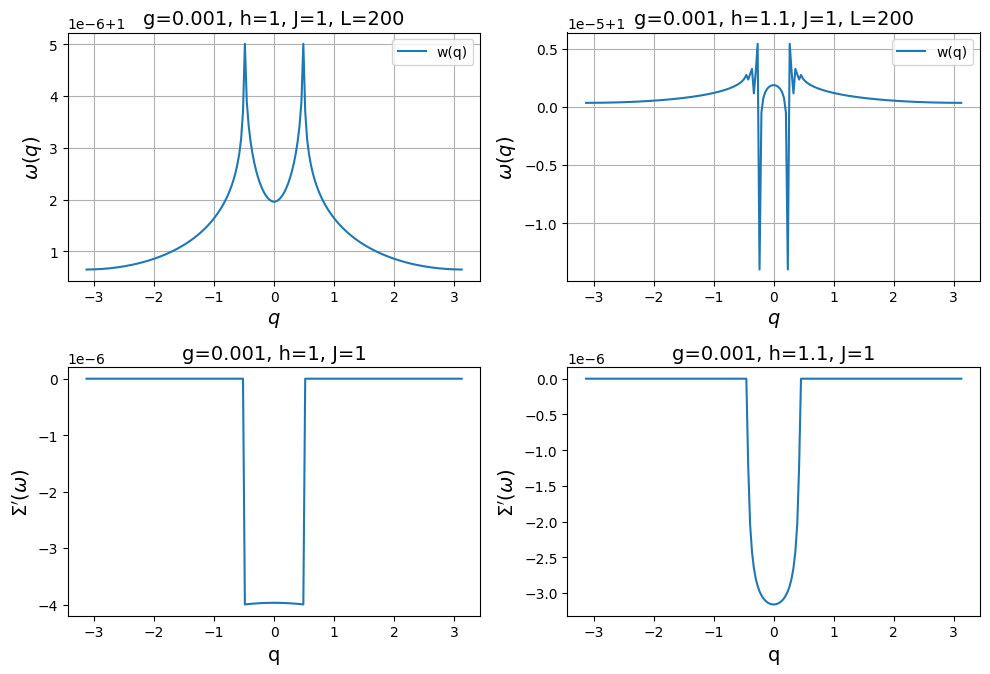

In [256]:
h_params = [1,1.1]
ncols = len(h_params)

fig, axs = plt.subplots(nrows=2,ncols=ncols,figsize=(10,7))

#params
g=0.001
L=200
J=1

q_space = q_space_gen(L)

q_label = [str(Fraction(x/np.pi).limit_denominator(L)) for x in q_space]

for i in range(ncols):
    h = h_params[i]
    print(h)
    
    w_arr = solve_w_arr(q_space,h,J,g,ax=axs[0,i],w0=1+g)
    axs[0,i].plot(q_space,w_arr,label=f"w(q)")
    axs[0,i].legend()
    axs[0,i].grid()
    axs[0,i].set_xlabel('$q$',fontsize=14)
    axs[0,i].set_ylabel("$\omega(q)$",fontsize=14)
    axs[0,i].set_title(f'g={g}, h={h}, J={J}, L={L}',fontsize=14)

    gamma = return_gamma(q_space,w_arr,g,h,J,100)
    axs[1,i].plot(q_space,gamma)
    axs[1,i].set_title(f"g={g}, h={h}, J={J}",fontsize=14)
    axs[1,i].set_xlabel("q",fontsize=14)
    axs[1,i].set_ylabel("$\Sigma'(\omega)$",fontsize=14)
    #axs[1,i].set_ylim(-0.5,0.25)

fig.tight_layout()
fig.savefig("figures_FI/spectrum/param_explore_J={J}_g={g}.png")

In [263]:
def spectrum_plots(params,g,h,J,L,param="h",w0=1,savename=False, gran=500,wtol=1.5e-8,figsize=(14,15)):
    ncols = len(params)
    fig, axs = plt.subplots(nrows=2,ncols=ncols,figsize=figsize)
    
    for i in range(ncols):
        if param == "h":
            h = params[i]
            print(f"h = {h}")
        elif param == "J":
            J = params[i]
            print(f"J = {J}")
        elif param == "g":
            g = params[i]
            print(f"g = {g}")
        elif param == "L":
            L = params[i]
            print(f"L = {L}")

        q_space = q_space_gen(L)
        q_label = [str(Fraction(x/np.pi).limit_denominator(L)) for x in q_space]
        
        w_arr = solve_w_arr(q_space,h,J,g,ax=axs[0,i],w0=w0)
        axs[0,i].plot(q_space,w_arr,label=f"w(q)")
        axs[0,i].legend()
        axs[0,i].minorticks_on()
        axs[0,i].grid(which="both")
        axs[0,i].set_xlabel('$q$',fontsize=14)
        axs[0,i].set_ylabel("$\omega(q)$",fontsize=14)
        axs[0,i].set_title(f'g={g}, h={h}, J={J}, L={L}',fontsize=14)
        #axs[0,i].set_ylim(1-2*g**2,1+6*g**2)

        gamma = return_gamma(q_space,w_arr,g=g,h=h,J=J,gran=gran)
        axs[1,i].plot(q_space,gamma)
        axs[1,i].set_title(f"g={g}, h={h}, J={J}",fontsize=14)
        axs[1,i].set_xlabel("q",fontsize=14)
        axs[1,i].set_ylabel("$\Sigma'(\omega)$",fontsize=14)
        axs[1,i].minorticks_on()
        axs[1,i].grid(which="both")
        #axs[1,i].set_ylim(-0.5*g**2,0.5*g**2)

    fig.tight_layout()
    if savename:
        fig.savefig("figures_FI/spectrum/param_explore_{savename}.png")

g = 0.001
Exception at q:-3.1258846903218442, k=-3.1258846903218442, w=[1] : invalid value encountered in divide
Exception at q:-3.1258846903218442, k=-3.1258846903218442, w=[1.] : invalid value encountered in divide
Exception at q:-3.1258846903218442, k=-3.1258846903218442, w=[1.] : invalid value encountered in divide
Exception at q:-3.1258846903218442, k=-3.1258846903218442, w=[1.00000001] : invalid value encountered in divide
Exception at q:-3.1258846903218442, k=-3.1258846903218442, w=[1.00000065] : invalid value encountered in divide
Exception at q:-3.1258846903218442, k=-3.1258846903218442, w=[1.00000065] : invalid value encountered in divide
Exception at q:-3.0944687637859465, k=-3.0944687637859465, w=[1] : invalid value encountered in divide
Exception at q:-3.0944687637859465, k=-3.0944687637859465, w=[1.] : invalid value encountered in divide
Exception at q:-3.0944687637859465, k=-3.0944687637859465, w=[1.] : invalid value encountered in divide
Exception at q:-3.09446876378594

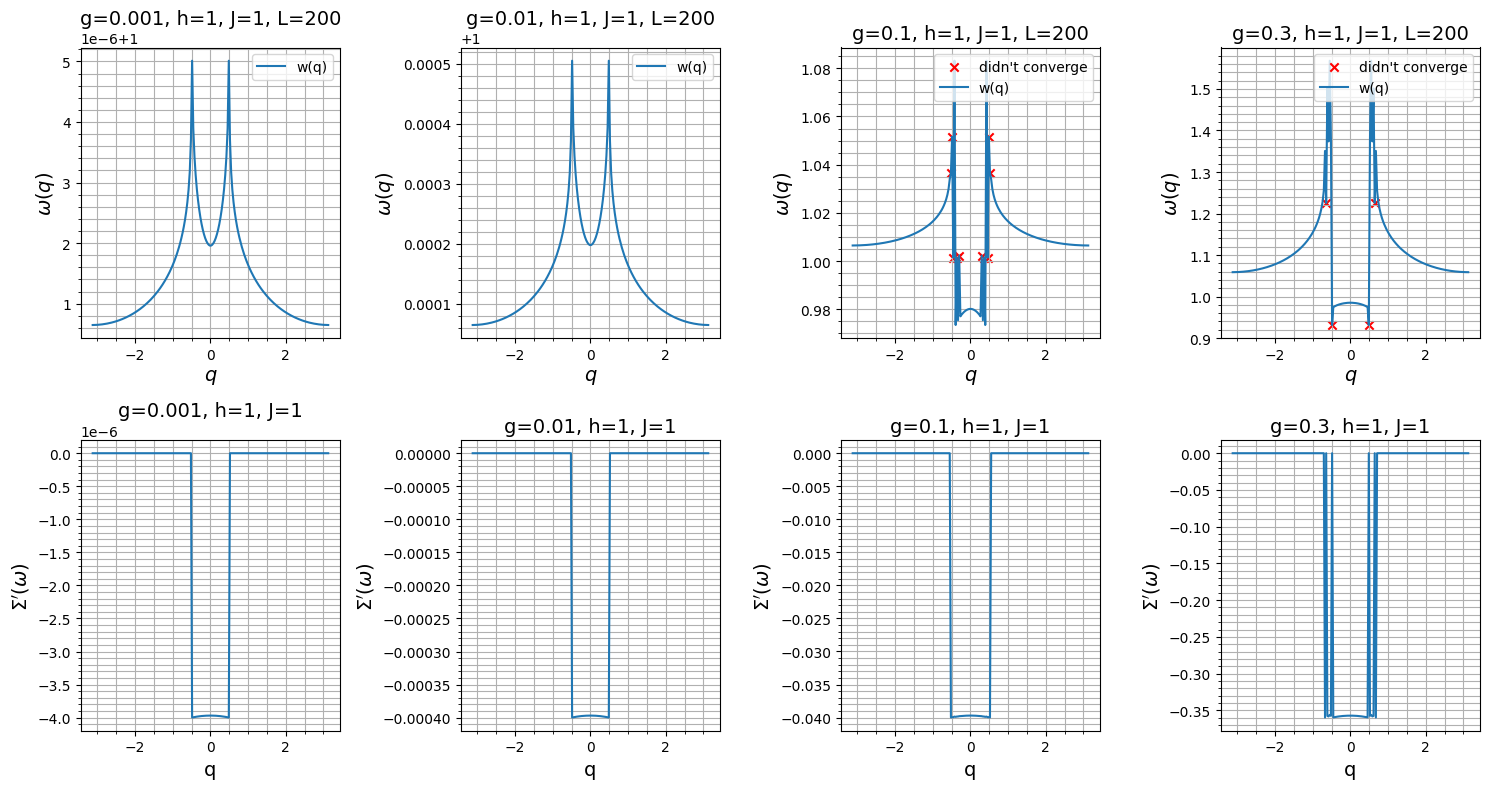

In [258]:
spectrum_plots([0.001,0.01,0.1,0.3],g=0,h=1,J=1,L=200,param="g",savename=False,figsize=(15,8))

h = 0.6
h = 0.95
NR-method didnt converge at q=-2/15
NR-method didnt converge at q=2/15
h = 1
Exception at q:-3.1258846903218442, k=-3.1258846903218442, w=[1.05] : invalid value encountered in divide
Exception at q:-3.1258846903218442, k=-3.1258846903218442, w=[1.05] : invalid value encountered in divide
Exception at q:-3.1258846903218442, k=-3.1258846903218442, w=[1.05] : invalid value encountered in divide
Exception at q:-3.1258846903218442, k=-3.1258846903218442, w=[1.05000002] : invalid value encountered in divide
Exception at q:-3.1258846903218442, k=-3.1258846903218442, w=[1.00006484] : invalid value encountered in divide
Exception at q:-3.1258846903218442, k=-3.1258846903218442, w=[1.00006485] : invalid value encountered in divide
Exception at q:-3.1258846903218442, k=-3.1258846903218442, w=[1.00006485] : invalid value encountered in divide
Exception at q:-3.0944687637859465, k=-3.0944687637859465, w=[1.05] : invalid value encountered in divide
Exception at q:-3.0944687637859465

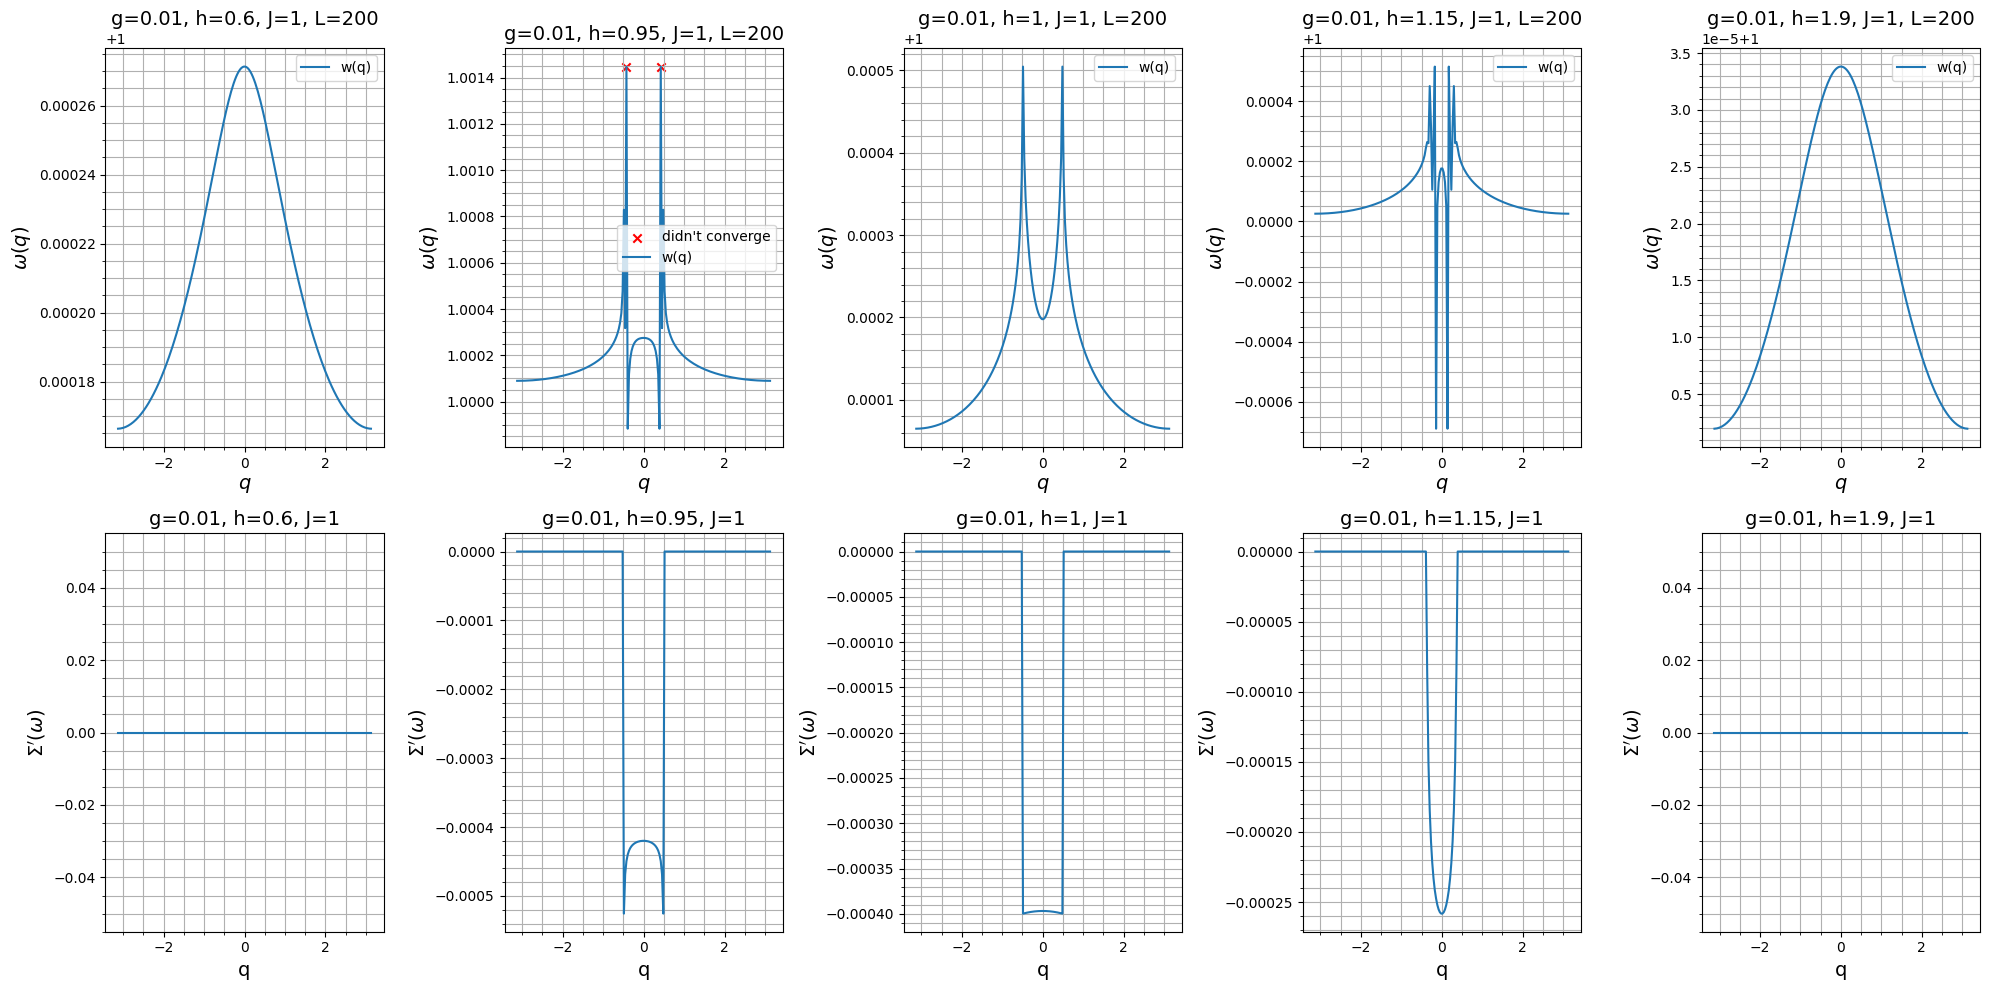

In [259]:
spectrum_plots([0.6,0.95,1,1.15,1.9],g=0.01,h=1,J=1,L=200,param="h", w0=1.05,savename=False, wtol=g**3, figsize=(20,10))

J = 0.6
J = 0.95
NR-method didnt converge at q=-2/15
NR-method didnt converge at q=2/15
J = 1.02
J = 1.15
NR-method didnt converge at q=-1/20
NR-method didnt converge at q=1/20
J = 1.5


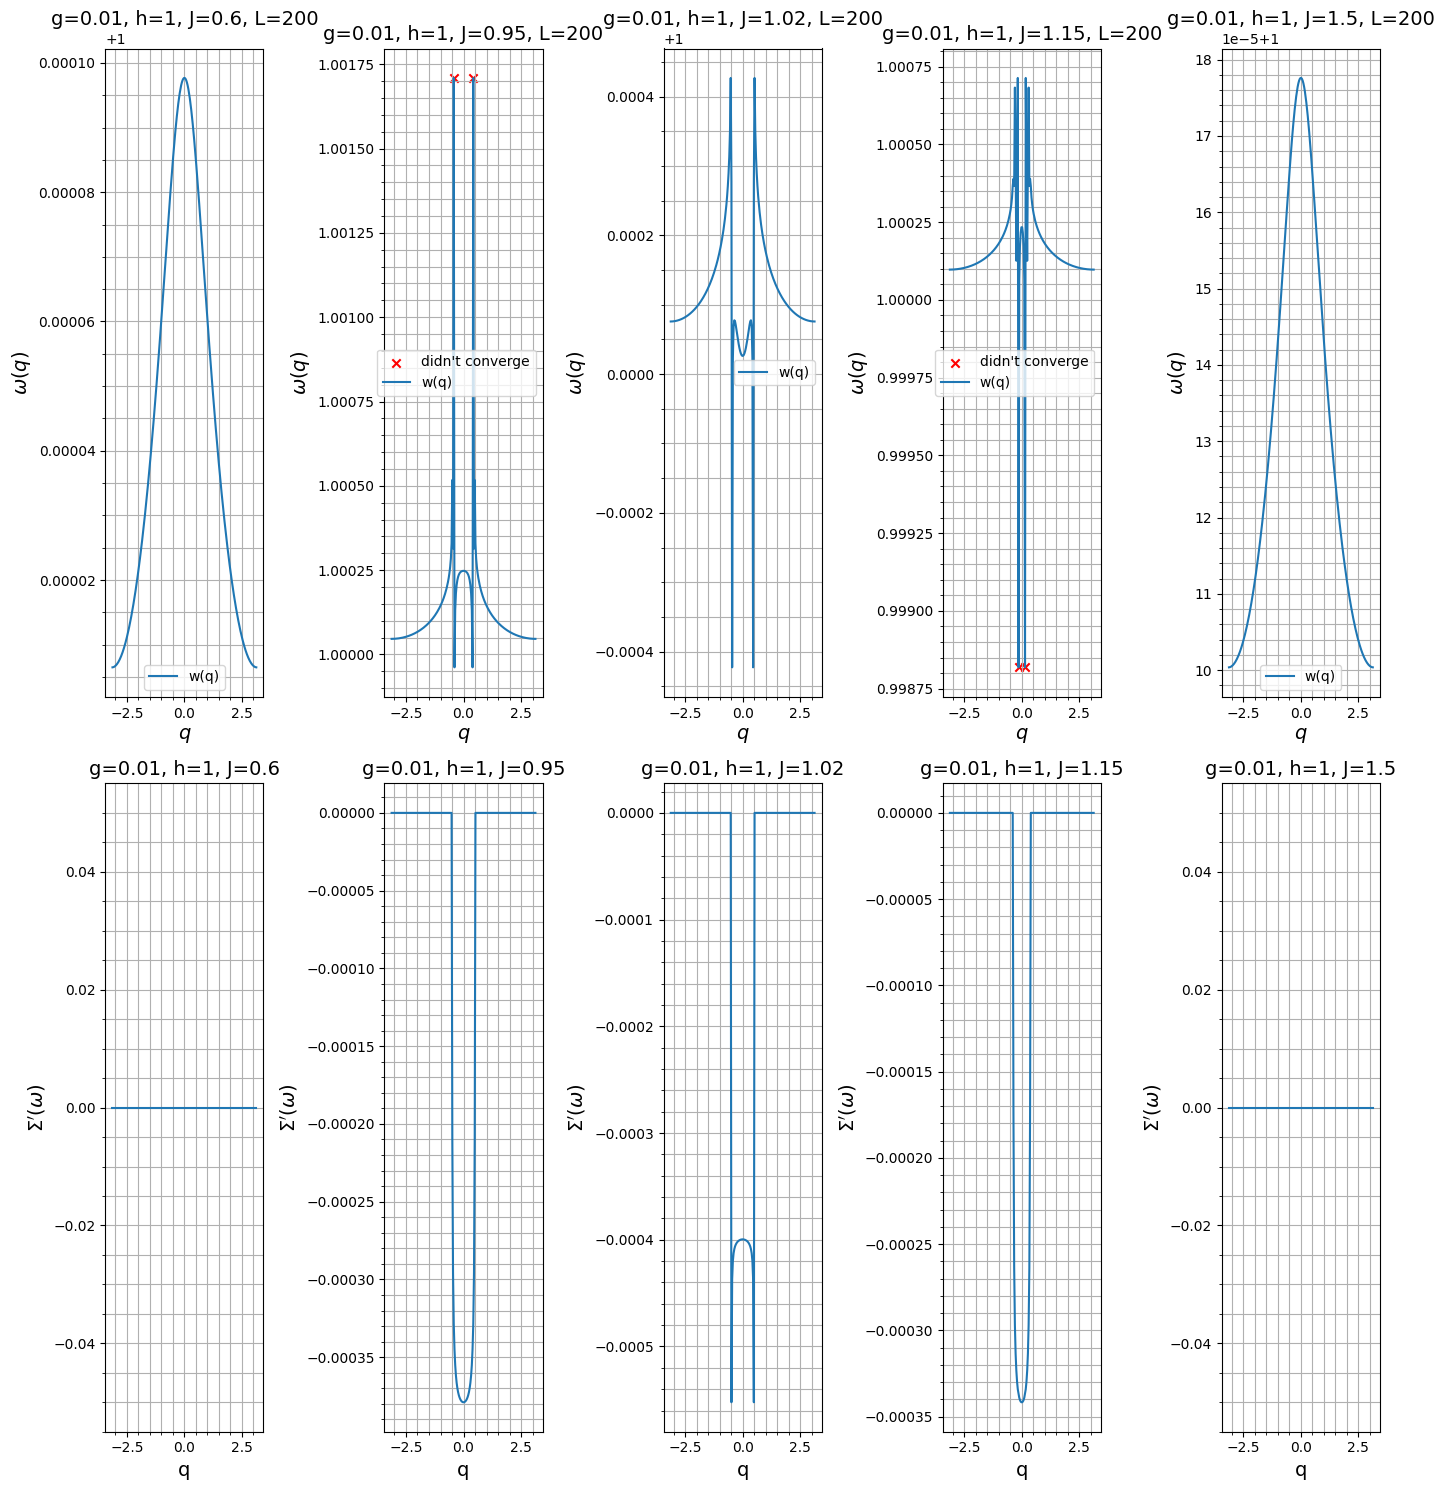

In [260]:
spectrum_plots([0.6,0.95,1.02,1.15,1.5],g=0.01,h=1,J=0.95,L=200,param="J",savename=False)

J = 1.6
J = 1.95
J = 2.02
J = 2.15


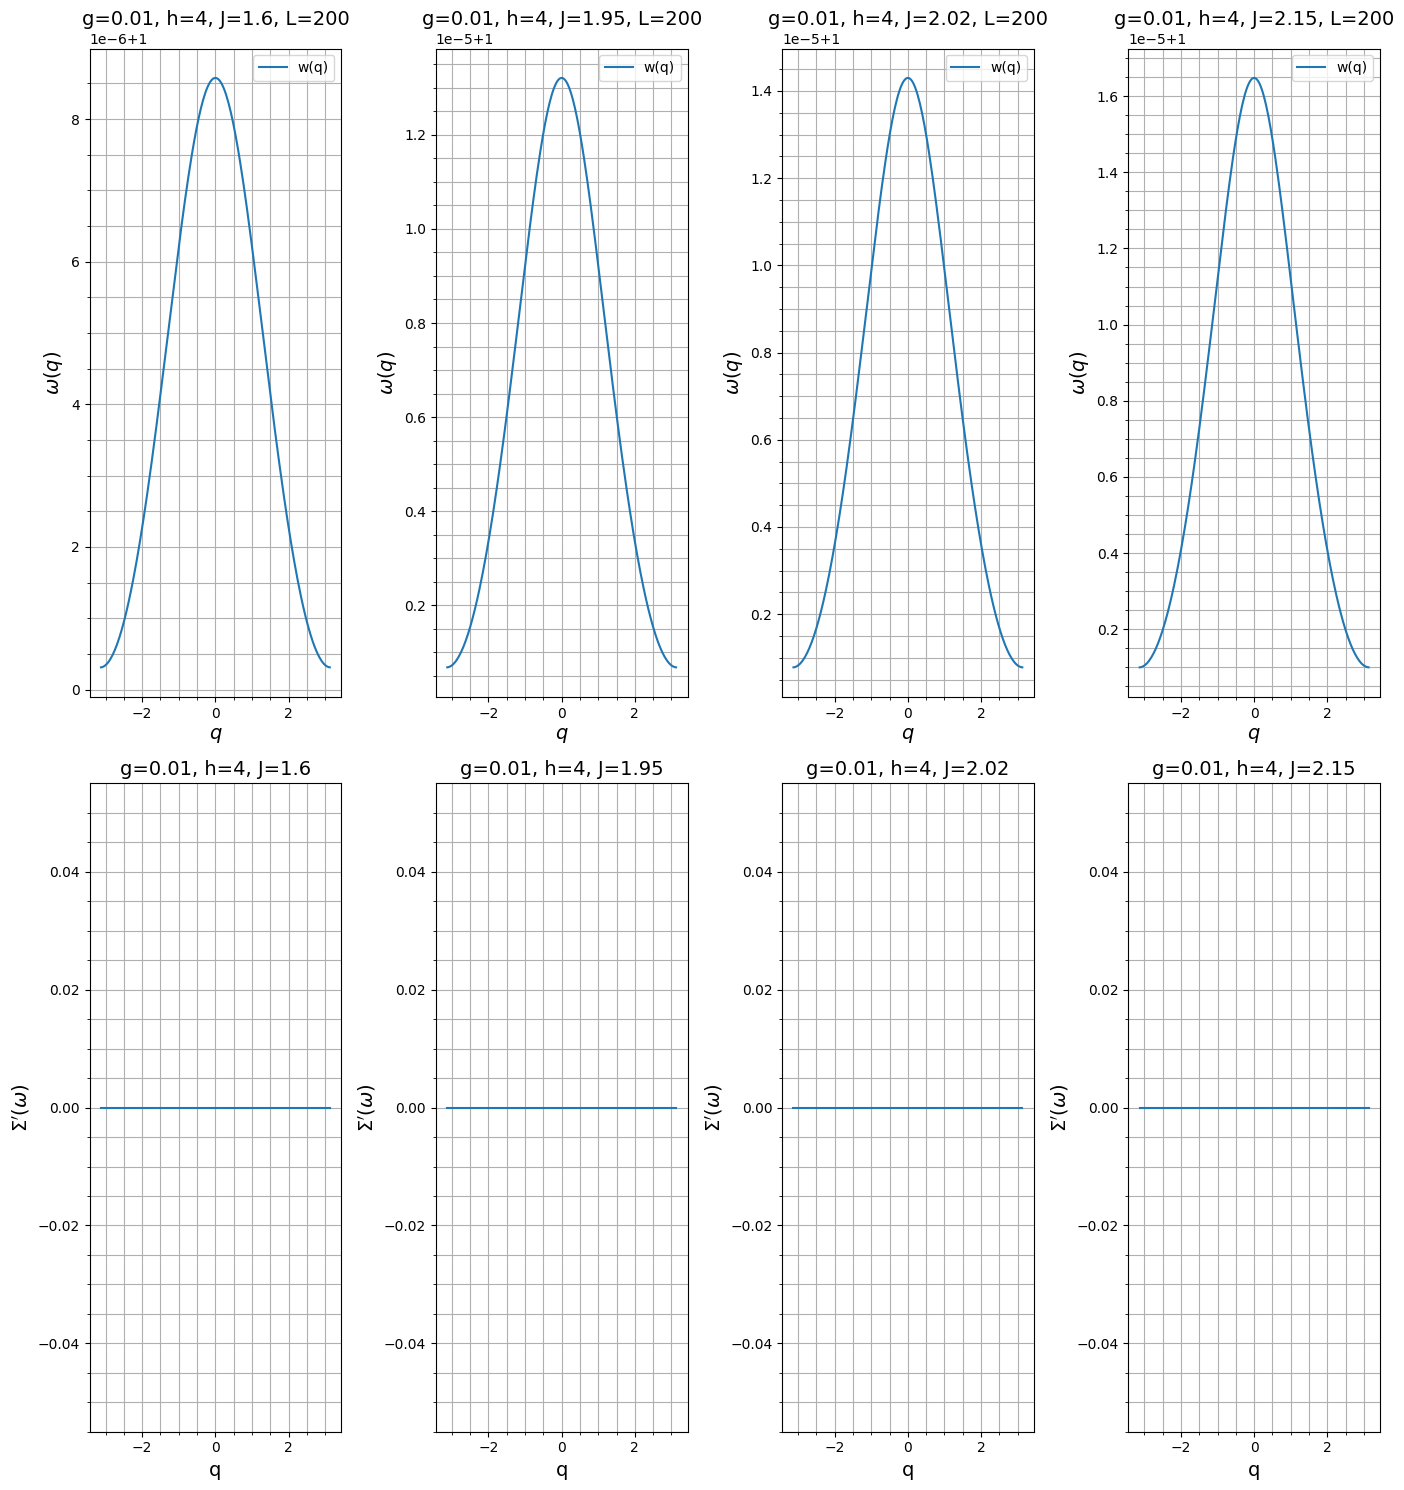

In [261]:
spectrum_plots([1.6,1.95,2.02,2.15],g=0.01,h=4,J=0.95,L=200,param="J",savename=False)

J = 0.2
NR-method didnt converge at q=-4/13
NR-method didnt converge at q=-5/17
NR-method didnt converge at q=-3/20
NR-method didnt converge at q=-1/14
NR-method didnt converge at q=-1/20
NR-method didnt converge at q=-1/20
NR-method didnt converge at q=0
NR-method didnt converge at q=0
NR-method didnt converge at q=1/20
NR-method didnt converge at q=1/20
NR-method didnt converge at q=1/14
NR-method didnt converge at q=3/20
NR-method didnt converge at q=5/17
NR-method didnt converge at q=4/13
J = 0.35
NR-method didnt converge at q=-7/18
NR-method didnt converge at q=7/18
J = 0.45
NR-method didnt converge at q=-7/19
NR-method didnt converge at q=-7/20
NR-method didnt converge at q=7/20
NR-method didnt converge at q=7/19
J = 0.6
NR-method didnt converge at q=-3/16
NR-method didnt converge at q=-2/15
NR-method didnt converge at q=-1/11
NR-method didnt converge at q=1/11
NR-method didnt converge at q=2/15
NR-method didnt converge at q=3/16


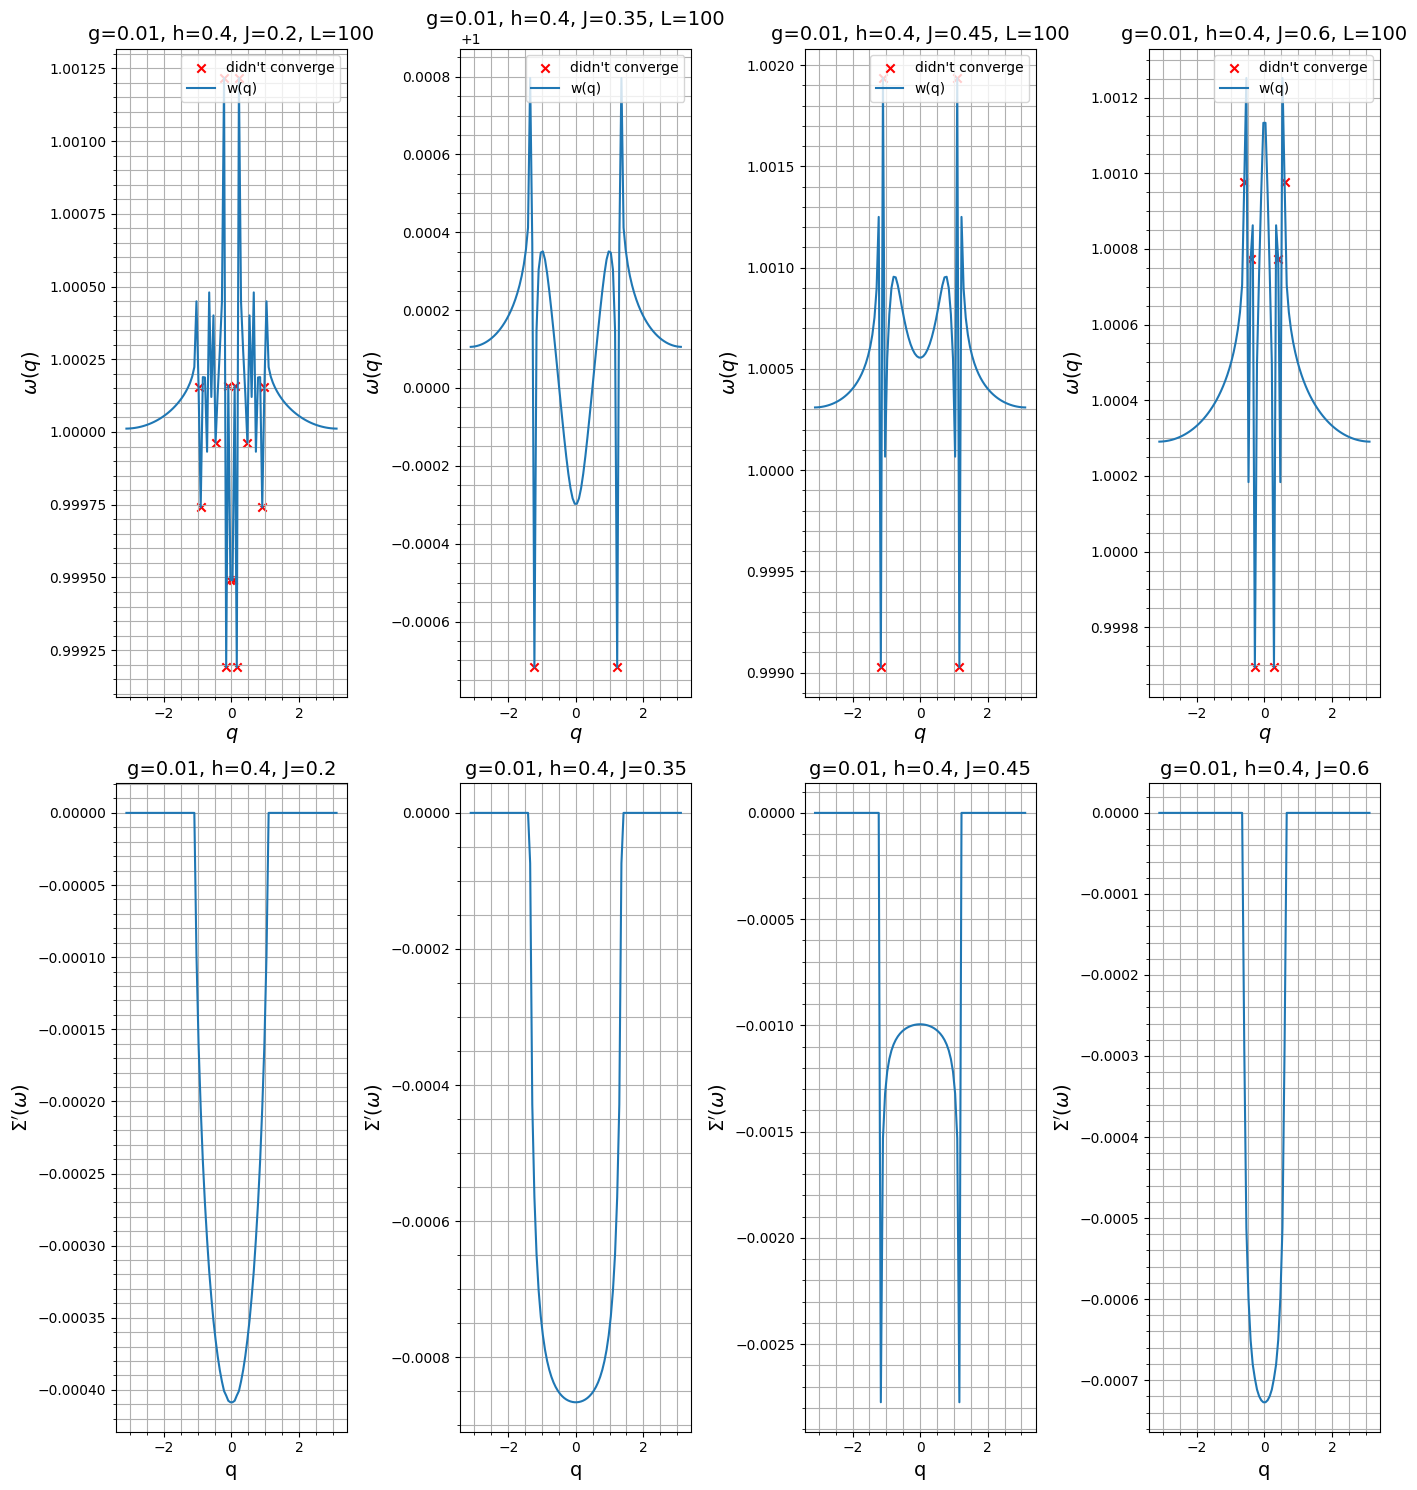

In [262]:
spectrum_plots([0.2,0.35,0.45,0.6],g=0.01,h=0.4,J=0.4,L=100, gran=500, param="J",savename=False)

J = 0.2
NR-method didnt converge at q=-5/8
NR-method didnt converge at q=-8/13
NR-method didnt converge at q=-3/5
NR-method didnt converge at q=-3/5
NR-method didnt converge at q=-7/12
NR-method didnt converge at q=-4/7
NR-method didnt converge at q=-9/16
NR-method didnt converge at q=-6/11
NR-method didnt converge at q=-10/19
NR-method didnt converge at q=-7/15
NR-method didnt converge at q=-5/11
NR-method didnt converge at q=-4/9
NR-method didnt converge at q=-7/16
NR-method didnt converge at q=-3/7
NR-method didnt converge at q=-5/12
NR-method didnt converge at q=-7/20
NR-method didnt converge at q=-1/3
NR-method didnt converge at q=-1/3
NR-method didnt converge at q=-6/19
NR-method didnt converge at q=-4/13
NR-method didnt converge at q=-5/17
NR-method didnt converge at q=-2/7
NR-method didnt converge at q=-3/11
NR-method didnt converge at q=-4/15
NR-method didnt converge at q=-1/4
NR-method didnt converge at q=-1/4
NR-method didnt converge at q=-4/17
NR-method didnt converge at q=

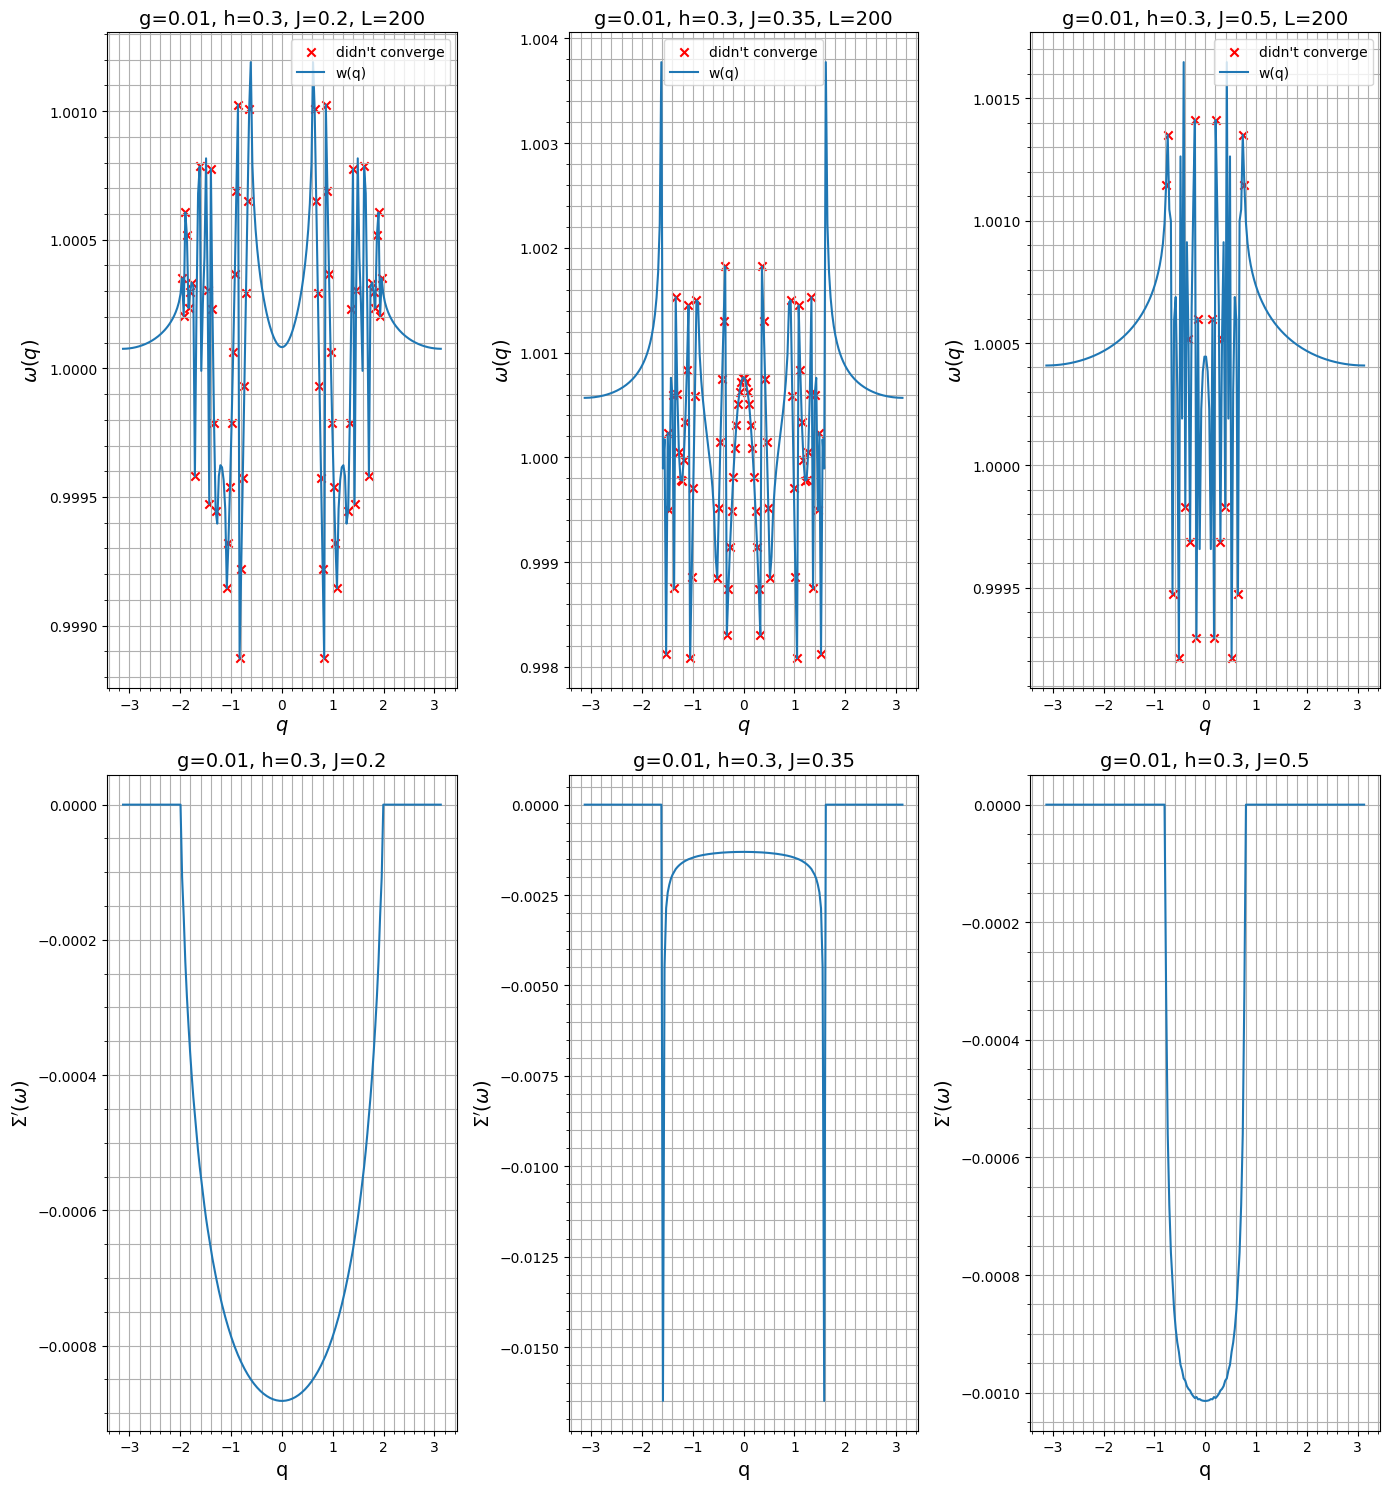

In [266]:
spectrum_plots([0.2,0.35,0.5],g=0.01,h=0.3,J=0.4,L=200, gran=500, param="J", wtol=1e-6,savename=False)

L = 50
L = 100
L = 200
L = 400


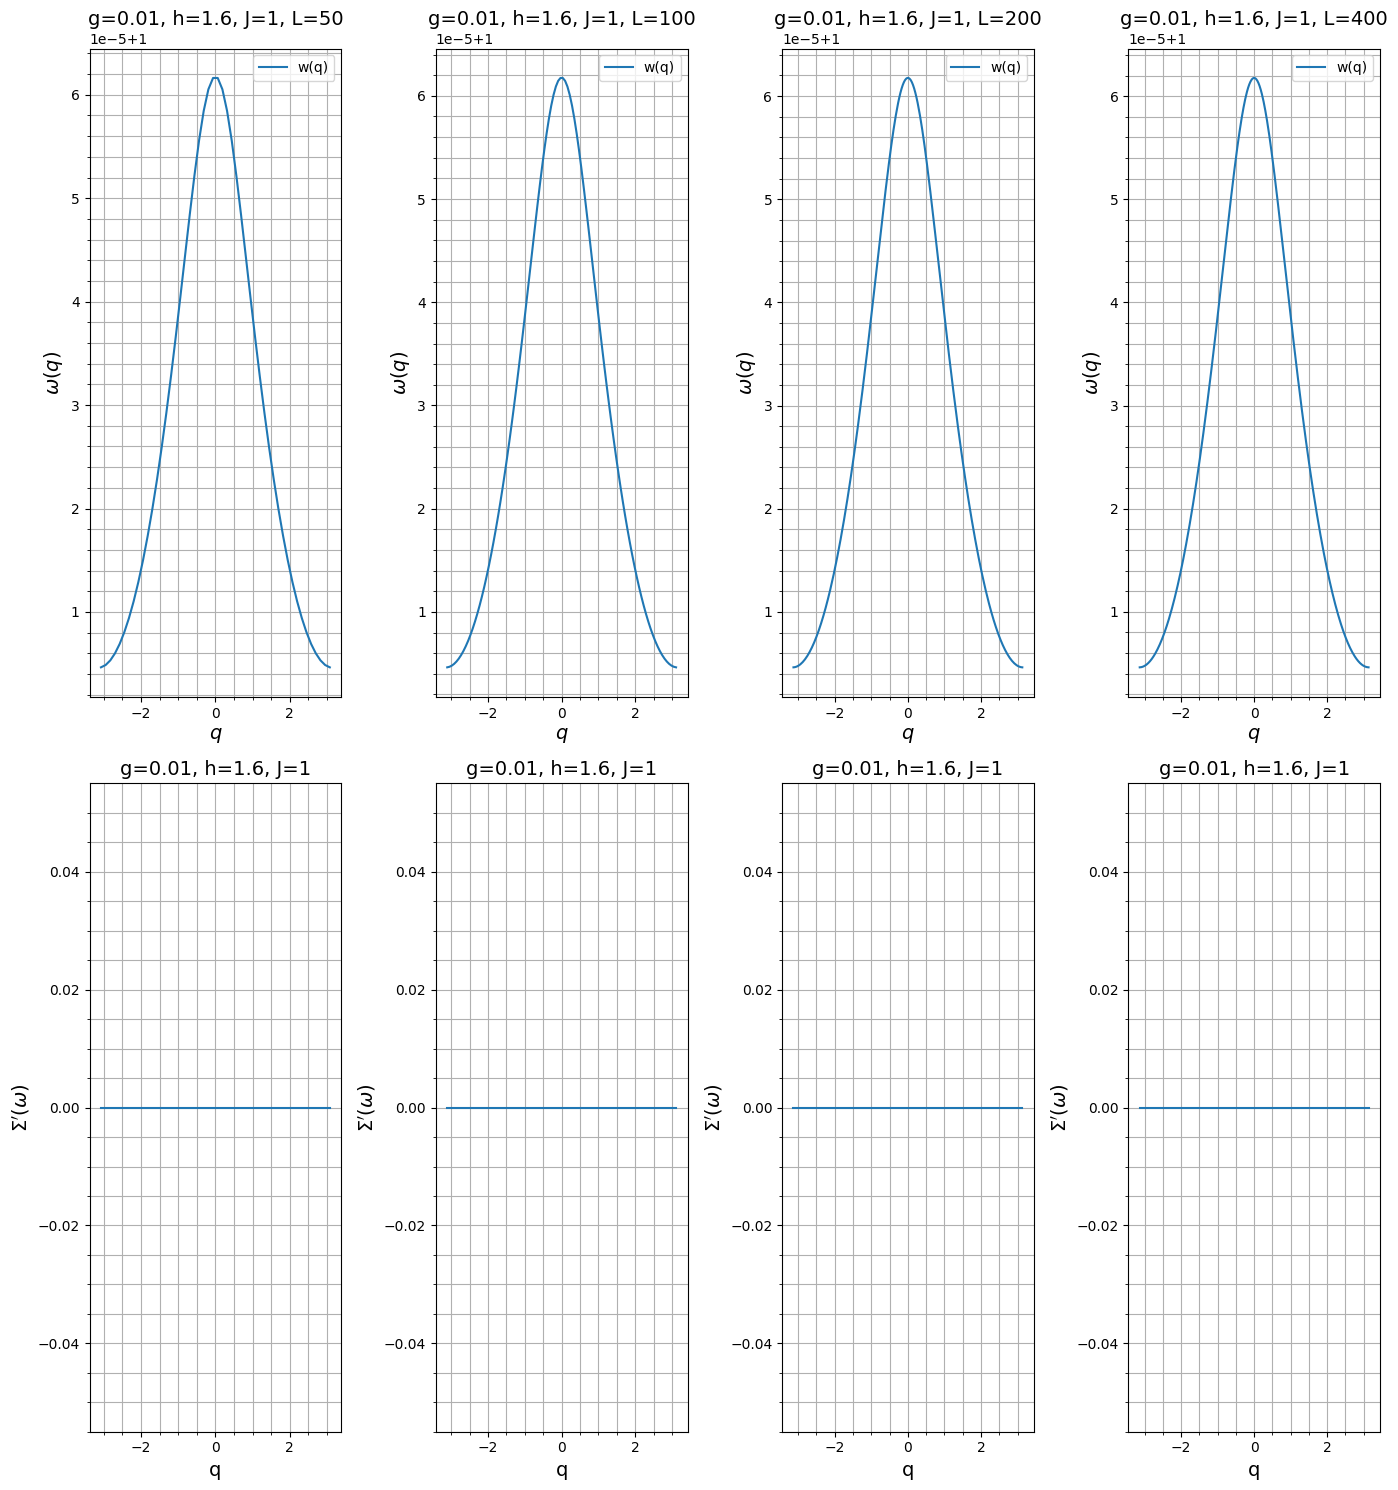

In [267]:
spectrum_plots([50,100,200,400],g=0.01,h=1.6,J=1,L=200,param="L",savename=False)

#### Visual test of fixed point iteration method

k = 0 , w = -4
k = 1 , w = -3.4375 , err = 0.5625
didn't converge: err = 0.5625
k = 2 , w = -2.3916 , err = 1.0459
didn't converge: err = 1.0458984375
k = 3 , w = -0.86744 , err = 1.52416
didn't converge: err = 1.5241620540618896
k = 4 , w = 0.37439 , err = 1.24183
didn't converge: err = 1.2418266832382727
k = 5 , w = 0.52746 , err = 0.15307
didn't converge: err = 0.1530713860361258
k = 6 , w = 0.49295 , err = 0.03451
didn't converge: err = 0.034511694186160236
k = 7 , w = 0.50175 , err = 0.0088
didn't converge: err = 0.00880398001482735
k = 8 , w = 0.49956 , err = 0.00219
didn't converge: err = 0.0021893246972051195
k = 9 , w = 0.50011 , err = 0.00055
didn't converge: err = 0.0005480494745661035
k = 10 , w = 0.49997 , err = 0.00014
didn't converge: err = 0.00013696730437057214
k = 11 , w = 0.50001 , err = 3e-05
didn't converge: err = 3.424463993456639e-05
k = 12 , w = 0.5 , err = 1e-05
didn't converge: err = 8.560984076755318e-06
k = 13 , w = 0.5 , err = 0.0
didn't converge: err = 2.1

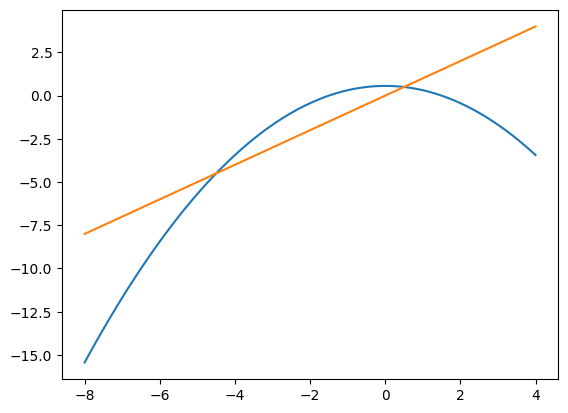

In [50]:
def functest(x):
    return 9/16-x**2/4

x_spac = np.linspace(-8,4,100)
plt.plot(x_spac,functest(x_spac))
plt.plot(x_spac,x_spac)

result = fix_point_ite(functest, (), w0=-4, tol=1E-12,verbose=True)

print(result)

# New imag parts

In [1]:
def func1(k,q,w,h,J):
    return w+Xi(h,J,k)-Xi(h,J,k-q)

def func2(k,q,w,h,J):
    return w-Xi(h,J,k)-Xi(h,J,k-q)

In [2]:
root_solver_k(func=func2,gran=10000,args=(1,0.1,1,1), message=0)

NameError: name 'root_solver_k' is not defined

In [8]:
def imag_new(q,h,J,w,N=100):
    im1 = 0
    k1, mes1, text = root_solver_k(func=func1,gran=N,args=(q,w,h,J), message=0)
    if mes1 == 1:
        print(f"end=No roots found for q={q}")
    for k0 in k1:
        im1 += 2*func(k0,q,h,J)/(Xi(h,J,k0)*Xi(h,J,k0-q))*1/(np.abs(jacfunc(k0,q,h,J)))
    im2 = 0
    k2, mes, text = root_solver_k(func=func2,gran=N,args=(q,w,h,J), message=0)
    if mes == 1:
        print(f"end=No roots found for q={q}, Message: {text}")
    for k0 in k2:
        try:
            im2 -= (1+func(k0,q,h,J))/(Xi(h,J,k0)*Xi(h,J,k0-q))*1/(np.abs(jacfunc(k0,q,h,J)))
        except Exception as e:
            print(e)
    return im1+im2
    

In [9]:
N=100
h=1
J=1
w=1
qlist = np.linspace(-np.pi,np.pi,N,100)
plotlist = [imag_new(q,h,J,w) for q in qlist]

end=No roots found for q=-3.141592653589793, Message: No roots found. Function is negative on entire domain
end=No roots found for q=-3.0781261353354537, Message: No roots found. Function is negative on entire domain
end=No roots found for q=-3.0146596170811146, Message: No roots found. Function is negative on entire domain
end=No roots found for q=-2.951193098826775, Message: No roots found. Function is negative on entire domain
end=No roots found for q=-2.887726580572436, Message: No roots found. Function is negative on entire domain
end=No roots found for q=-2.8242600623180967, Message: No roots found. Function is negative on entire domain
end=No roots found for q=-2.7607935440637577, Message: No roots found. Function is negative on entire domain
end=No roots found for q=-2.697327025809418, Message: No roots found. Function is negative on entire domain
end=No roots found for q=-2.633860507555079, Message: No roots found. Function is negative on entire domain
end=No roots found for q

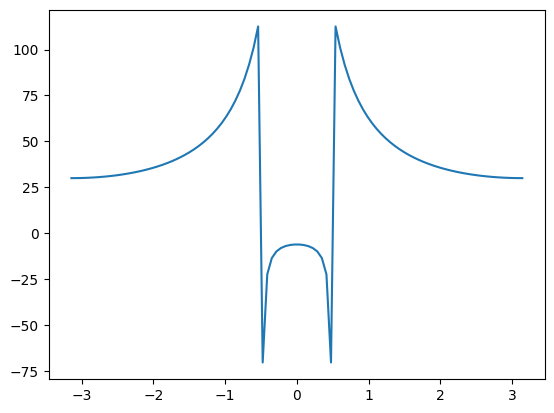

In [10]:
plt.plot(qlist,plotlist)

({0.35097, -0.15097}, 0, 'Root solver converged')


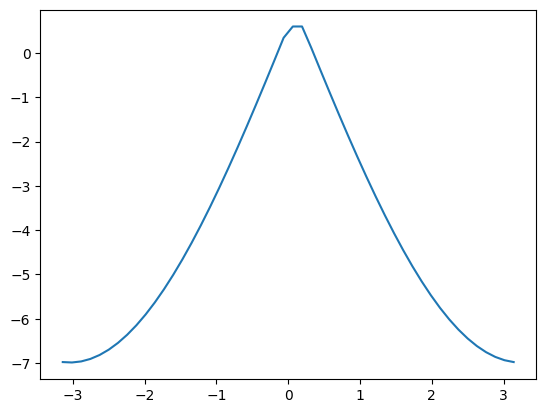

In [35]:
plott = [w-Xi(h,J,x)-Xi(h,J,x-0.2) for x in np.linspace(-np.pi,np.pi,50)]
plt.plot(np.linspace(-np.pi,np.pi,50),plott)
print(root_solver_k(func2,100,(0.2,1,1,1)))